<a href="https://colab.research.google.com/github/Nicoov21/data-mining/blob/main/5-Talleres/Taller-N4/FutbolPro1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Exploración y detección de nulos, vacíos y duplicados

1. Carga el dataset sintético generado dentro del notebook y observa su estructura
con `.head()` y `.info()`

In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CSV/FutbolData_Pro.csv')

In [2]:
df.head()

Player_ID      Name  Age Nationality    Position   Club            League  \
0          1  Player_1   23       Italy  Goalkeeper  FC_38       Brasileirao   
1          2  Player_2   36       Italy     Forward  FC_31  Argentine League   
2          3  Player_3   31     England    Defender  FC_36           La Liga   
3          4  Player_4   27    Portugal  Goalkeeper  FC_19       Brasileirao   
4          5  Player_5   24      Brazil  Midfielder  FC_48           La Liga   

   Height_cm  Weight_kg Preferred_Foot  ...  Pass_Accuracy  Shot_Accuracy  \
0      179.5       69.5          Right  ...           0.49           0.64   
1      176.8       59.2           Left  ...           1.00           1.00   
2      181.4       75.8          Right  ...           0.92           0.06   
3      174.7       91.3           Left  ...           0.89           0.96   
4      172.1       77.2           Left  ...           1.00           0.39   

   Offensive_Contribution  Defensive_Contribution  Overall_Rating  \
0                    0.39                    3.72            71.3   
1                    1.00                   11.83            71.2   
2                    0.19                    1.38            75.0   
3                    1.43                   22.00            60.8   
4                    0.25                   13.17            55.3   

   Market_per_Rating    Age_Group  Position_Group  Injury_Risk  \
0               0.93        Prime         Defense         0.52   
1               0.94      Veteran          Attack         0.45   
2               0.84  Experienced         Defense         0.48   
3               0.84        Prime         Defense         0.20   
4               1.52        Prime        Midfield         0.59   

   Experience_Index  
0              20.5  
1              21.0  
2              34.0  
3              17.0  
4              18.0  

[5 rows x 99 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 99 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player_ID                 1000 non-null   int64  
 1   Name                      950 non-null    object 
 2   Age                       1000 non-null   int64  
 3   Nationality               1000 non-null   object 
 4   Position                  1000 non-null   object 
 5   Club                      1000 non-null   object 
 6   League                    1000 non-null   object 
 7   Height_cm                 1000 non-null   float64
 8   Weight_kg                 1000 non-null   float64
 9   Preferred_Foot            1000 non-null   object 
 10  Matches_Played            1000 non-null   int64  
 11  Minutes_Played            1000 non-null   int64  
 12  Goals                     950 non-null    float64
 13  Assists                   1000 non-null   int64  
 14  Total_Sho

In [4]:
df.shape

(1000, 99)

2. Cuenta los valores nulos en cada columna con `df.isna().sum()`.

In [5]:
df.isna().sum().sort_values(ascending=False).head(10)

Name                 50
Goals                50
Passes_Completed     50
Crossing             50
Fouls_Committed      50
Strength             50
Offensive_Support    50
Discipline           50
Vision               50
Touches_per_Game     50
dtype: int64

3. Identifica filas duplicadas con `df.duplicated().sum()` y reflexiona si deberían
eliminarse.

In [6]:
df.duplicated().sum()
#En este caso, con un número pequeño de duplicados,
# no encuentro que sea factible eliminar los duplicados,
# ya que no creo que se vea tan afectado el dataset con estos datos,
# además que mientras más datos tengamos, mejor será el entrenamiento y testeo del modelo.

np.int64(0)

4. Ejercicio: crea una función que muestre el porcentaje de valores faltantes por
columna.

In [7]:
def porcNulos(dataset):
  columnas = dataset.columns.tolist()
  poct = dataset[columnas].isna().mean() * 100
  return poct.sort_values(ascending=False).head(10)

In [8]:
x = porcNulos(df)
x

Name                 5.0
Goals                5.0
Passes_Completed     5.0
Crossing             5.0
Fouls_Committed      5.0
Strength             5.0
Offensive_Support    5.0
Discipline           5.0
Vision               5.0
Touches_per_Game     5.0
dtype: float64

# Limpieza y tratamiento de valores faltantes

In [9]:
dfOriginal = df.copy()

1. Decide cómo imputar valores nulos según el tipo de dato (media, mediana o
moda)

In [10]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
    df[col].fillna(df[col].mean(), inplace=True) #o mediana

/tmp/ipython-input-2909295794.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True) #o mediana


2. Reemplaza cadenas vacías ('') en columnas categóricas por NaN y luego
imputarlas con 'Desconocido'.

In [11]:
import numpy as np

catCols = df.select_dtypes(include=['object']).columns.tolist()
for col in catCols:
    df[col] = df[col].replace('', np.nan)

print(df[catCols].isna().sum().sort_values(ascending=False).head(10))

for col in catCols:
    df[col].fillna('Desconocido', inplace=True)

print(df[catCols].isna().sum().sort_values(ascending=False).head(10))

Name              50
Nationality        0
Position           0
Club               0
League             0
Preferred_Foot     0
Age_Group          0
Position_Group     0
dtype: int64
Name              0
Nationality       0
Position          0
Club              0
League            0
Preferred_Foot    0
Age_Group         0
Position_Group    0
dtype: int64


/tmp/ipython-input-2465423172.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Desconocido', inplace=True)


3. Ejercicio: compara resultados antes y después de imputar con
`.describe(include='all')`.

In [12]:
print(f"Antes de imputar \n {dfOriginal.describe(include='all')}")
print(f"Después de imputar \n {df.describe(include='all')}")

Antes de imputar 
           Player_ID         Name          Age Nationality  Position   Club  \
count   1000.000000          950  1000.000000        1000      1000   1000   
unique          NaN          950          NaN          11         4     50   
top             NaN  Player_1000          NaN    Portugal  Defender  FC_28   
freq            NaN            1          NaN         100       262     29   
mean     500.500000          NaN    27.845000         NaN       NaN    NaN   
std      288.819436          NaN     6.854046         NaN       NaN    NaN   
min        1.000000          NaN    17.000000         NaN       NaN    NaN   
25%      250.750000          NaN    22.000000         NaN       NaN    NaN   
50%      500.500000          NaN    28.000000         NaN       NaN    NaN   
75%      750.250000          NaN    34.000000         NaN       NaN    NaN   
max     1000.000000          NaN    39.000000         NaN       NaN    NaN   

       League    Height_cm    Weight_kg Pref

# Detección y tratamiento de outliers

In [13]:
dfSinOutliers = df.copy()

1. Usa el método del rango intercuartílico (IQR) para detectar valores atípicos en
columnas numéricas.

In [14]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} tiene {outliers.shape[0]} outliers.")

Player_ID tiene 0 outliers.
Age tiene 0 outliers.
Height_cm tiene 7 outliers.
Weight_kg tiene 10 outliers.
Matches_Played tiene 0 outliers.
Minutes_Played tiene 0 outliers.
Goals tiene 13 outliers.
Assists tiene 21 outliers.
Total_Shots tiene 0 outliers.
Shots_on_Target tiene 0 outliers.
Total_Passes tiene 0 outliers.
Passes_Completed tiene 0 outliers.
Successful_Tackles tiene 0 outliers.
Fouls_Committed tiene 0 outliers.
Speed tiene 0 outliers.
Acceleration tiene 0 outliers.
Stamina tiene 0 outliers.
Strength tiene 0 outliers.
Agility tiene 0 outliers.
Jumping tiene 0 outliers.
Balance tiene 0 outliers.
Shot_Power tiene 0 outliers.
Body_Control tiene 0 outliers.
Injury_Frequency tiene 0 outliers.
Ball_Control tiene 0 outliers.
Short_Pass tiene 0 outliers.
Long_Pass tiene 0 outliers.
Dribbling tiene 0 outliers.
Crossing tiene 0 outliers.
Heading tiene 0 outliers.
Long_Shots tiene 0 outliers.
Penalties tiene 0 outliers.
Curve tiene 0 outliers.
Marking tiene 0 outliers.
Interceptions tie

In [15]:
# #ahora se probará con aplicarle el tratamiento de outliers a solo columnas principales
# cols_principales = [






#Este código es el que ocupe antes, tuve que ocupar 3 en los límites, ya qué si ponía 1.5
#el dfSinOutliers quedaba con 360 y con el 3 queda en 774
for col in numCols:
  Q1 = dfSinOutliers[col].quantile(0.25)
  Q3 = dfSinOutliers[col].quantile(0.75)
  IQR = Q3 - Q1
  dfSinOutliers = dfSinOutliers[(dfSinOutliers[col] >= Q1 - 1.5 * IQR) & (dfSinOutliers[col] <= Q3 + 1.5 * IQR)]

2. Grafica boxplots antes y después del tratamiento para observar los cambios.


Graficos boxplots antes del tratamiento


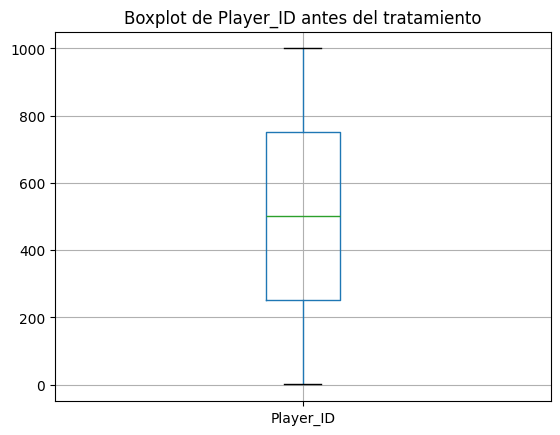

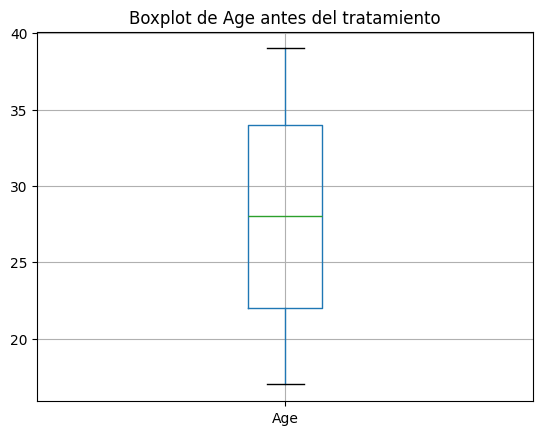

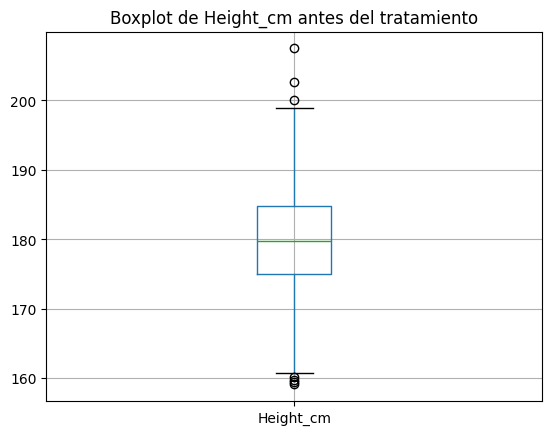

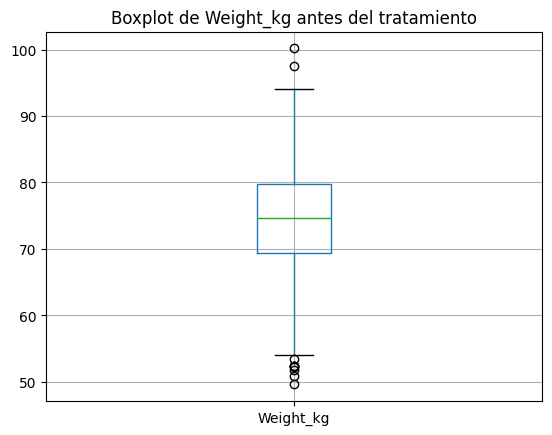

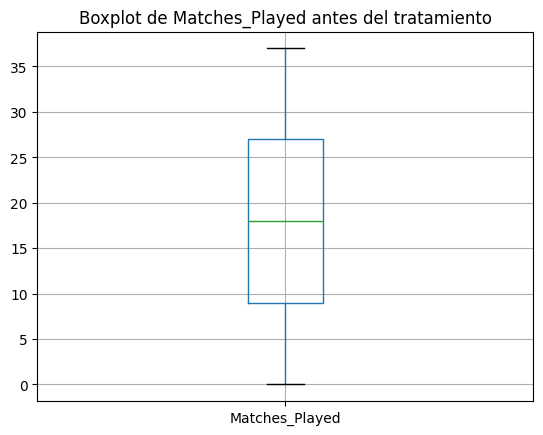

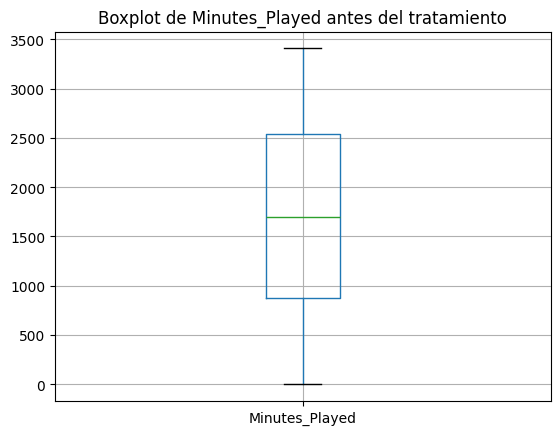

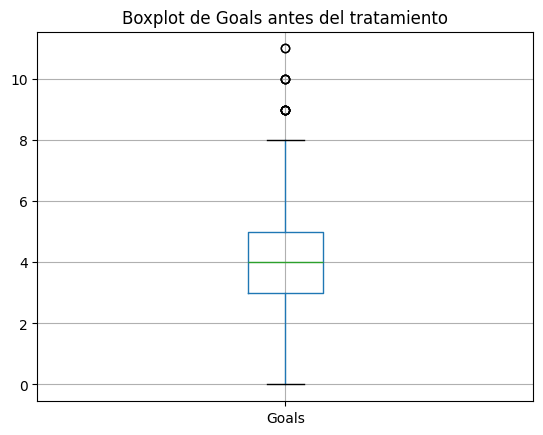

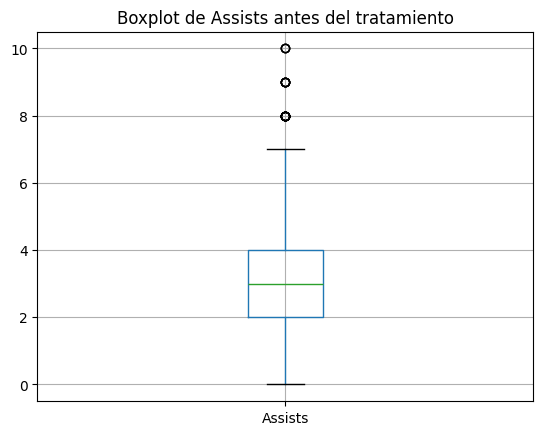

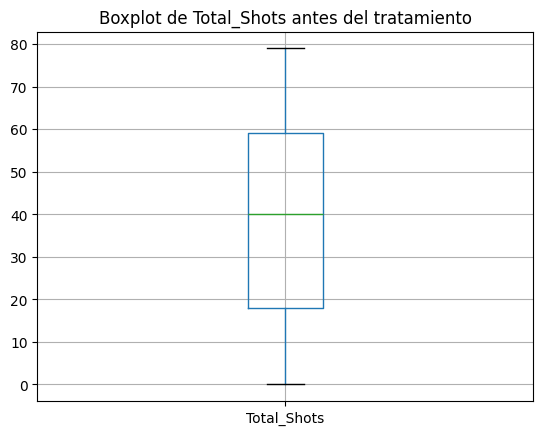

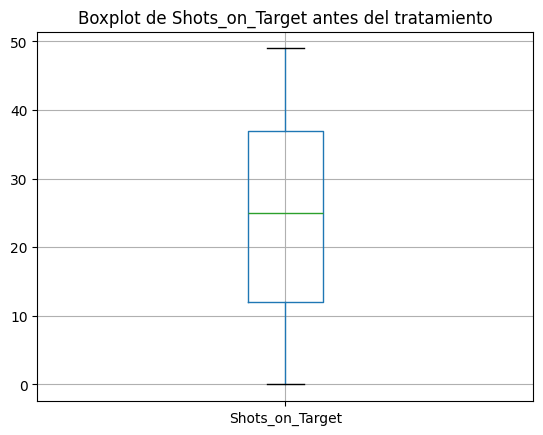

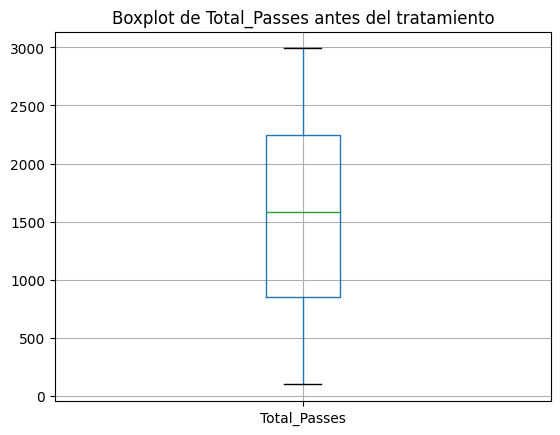

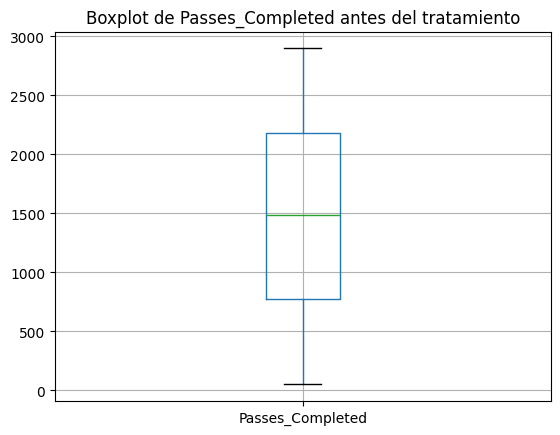

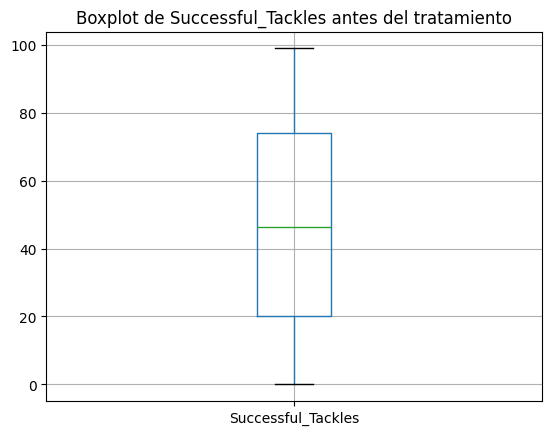

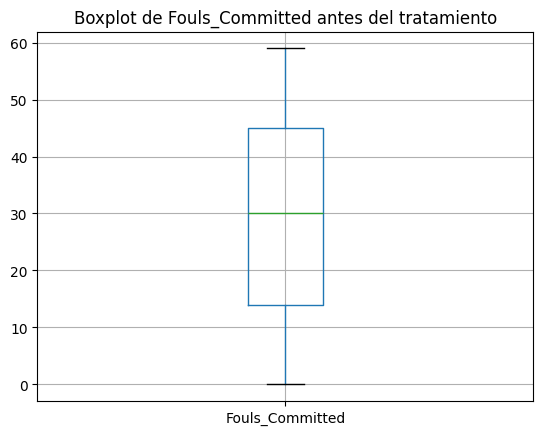

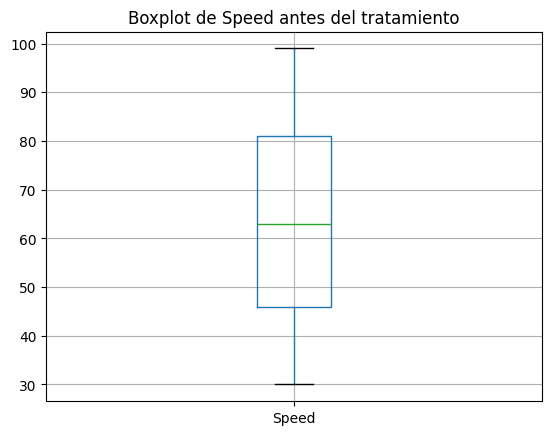

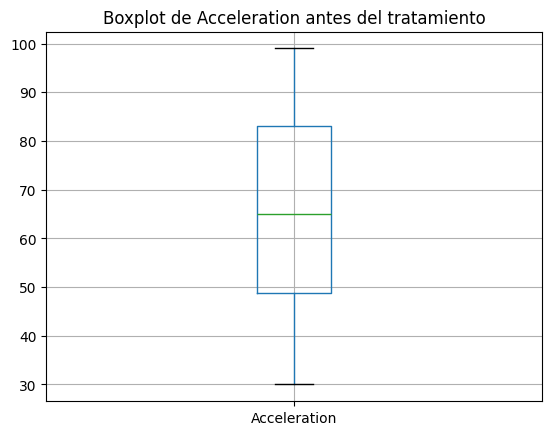

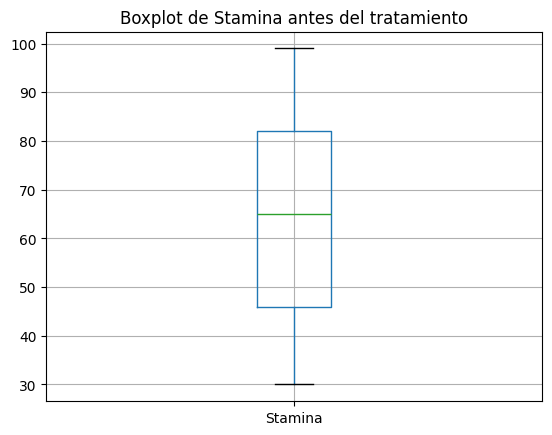

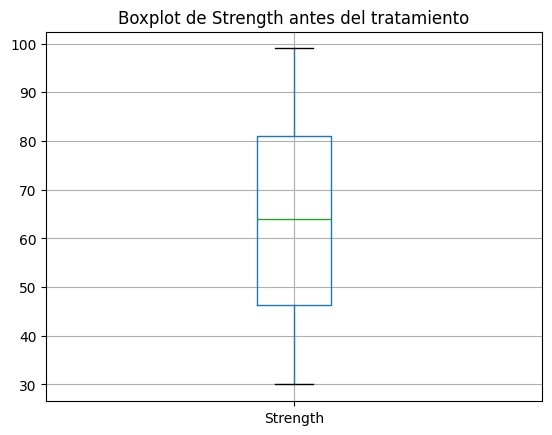

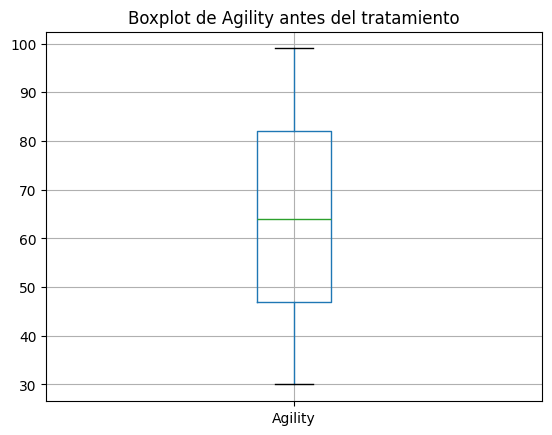

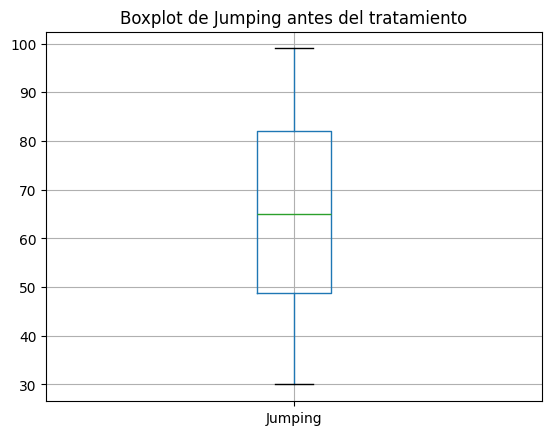

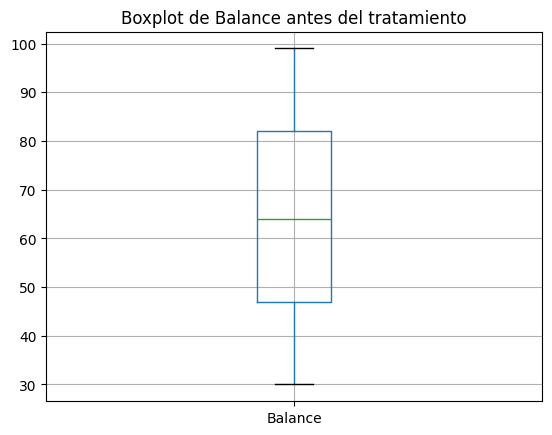

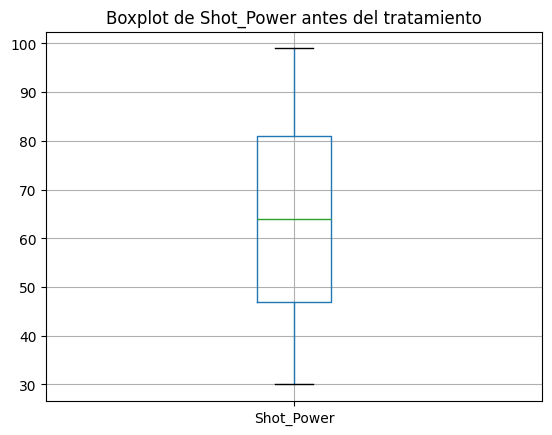

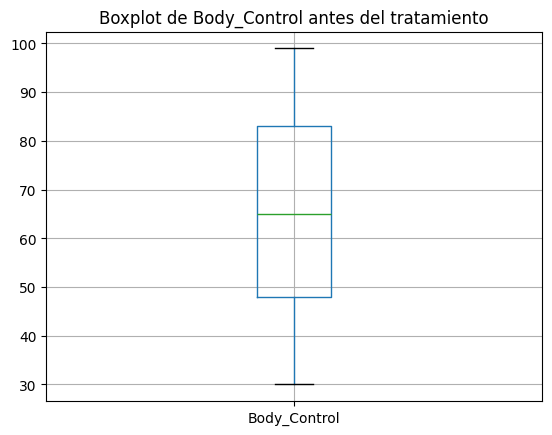

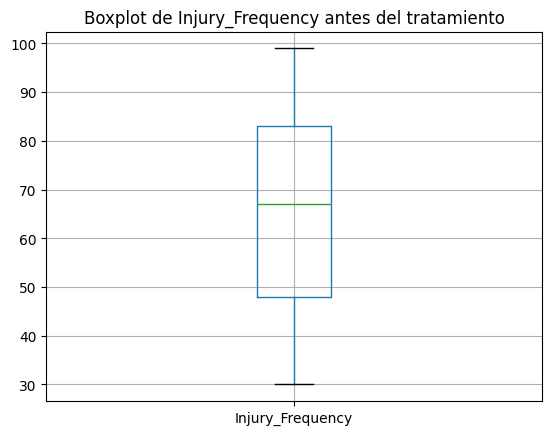

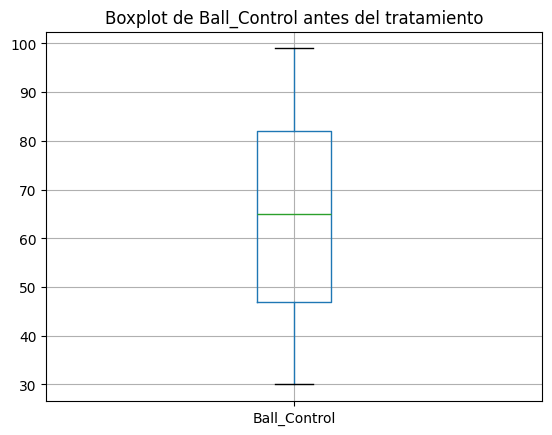

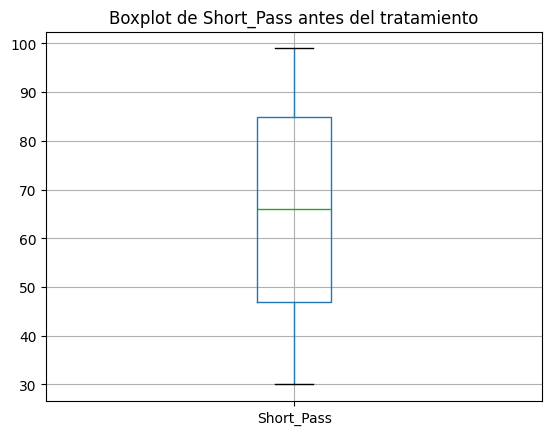

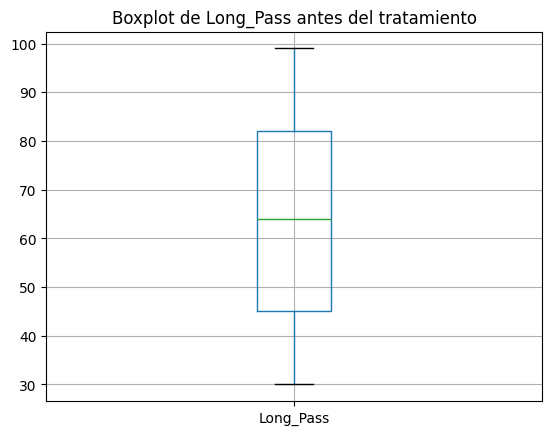

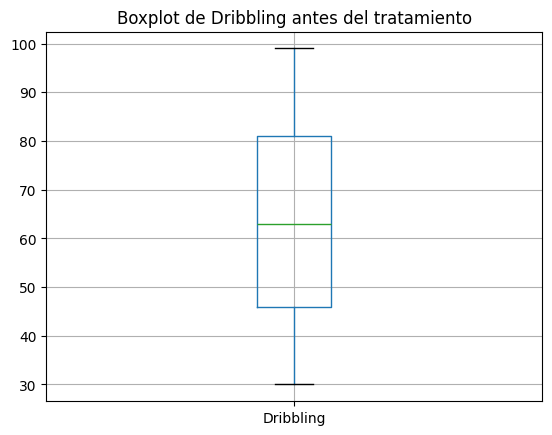

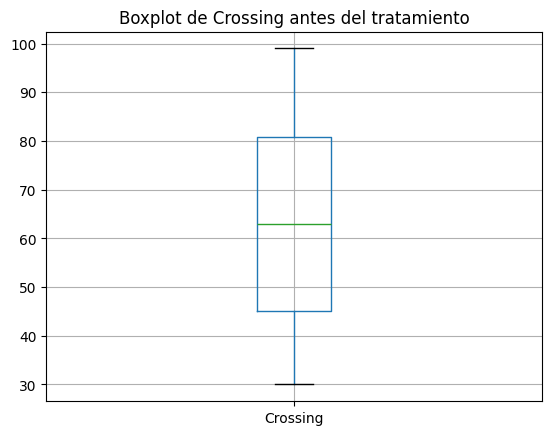

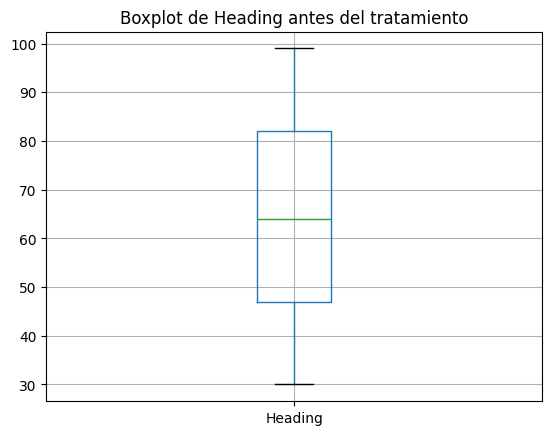

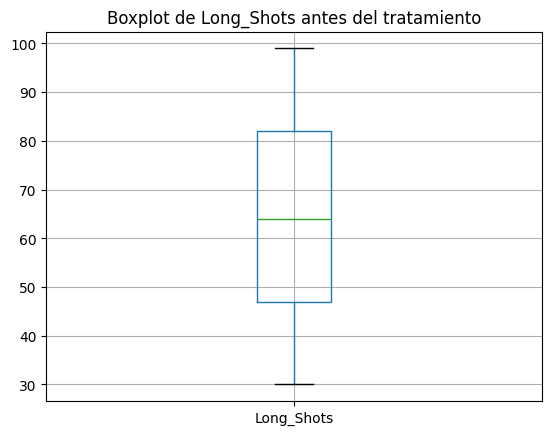

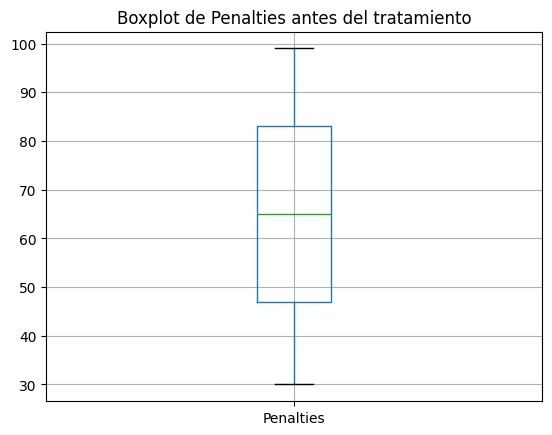

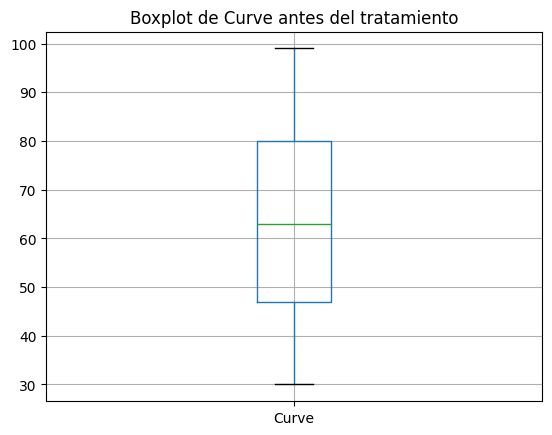

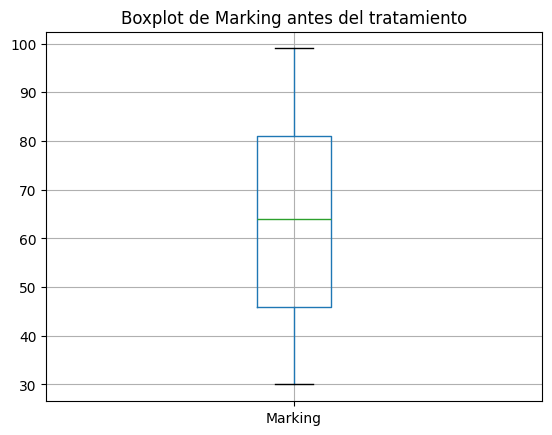

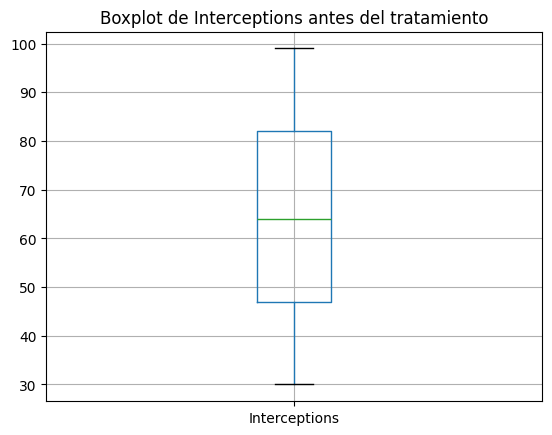

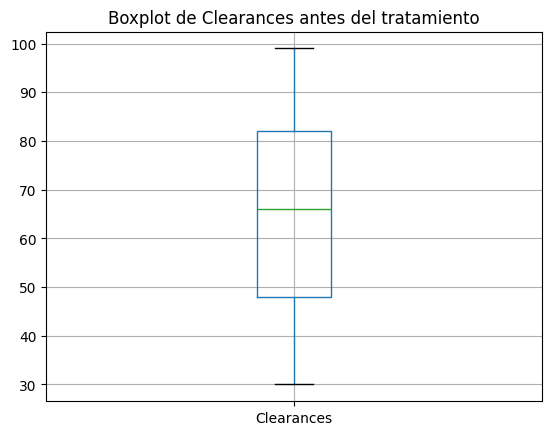

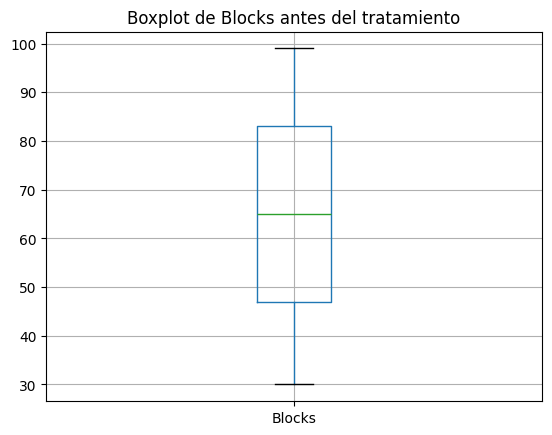

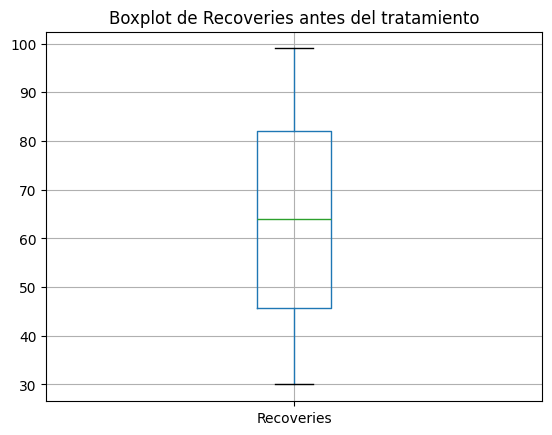

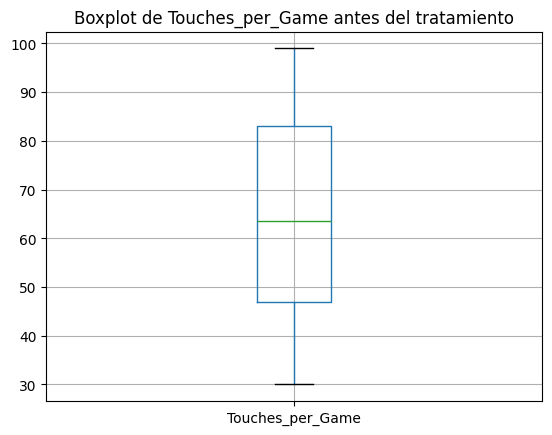

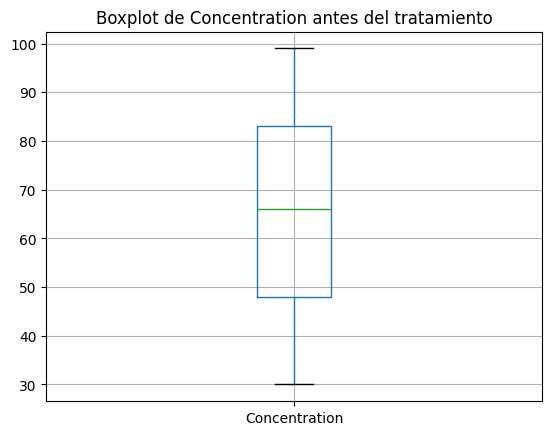

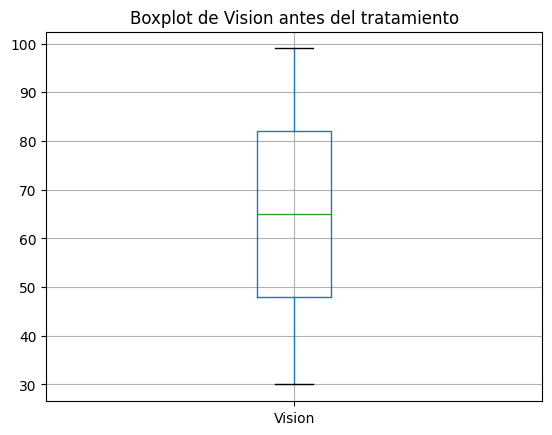

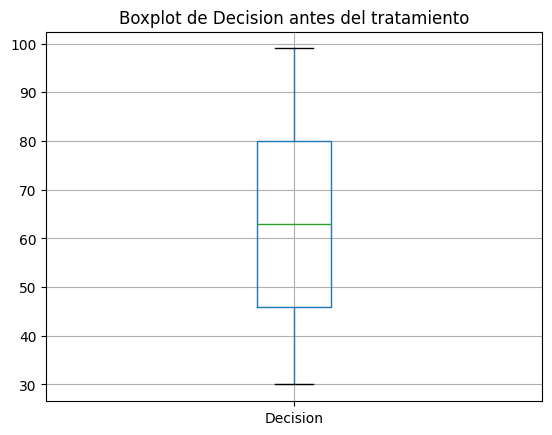

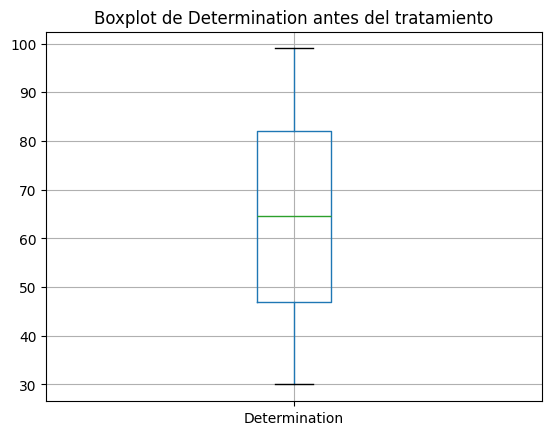

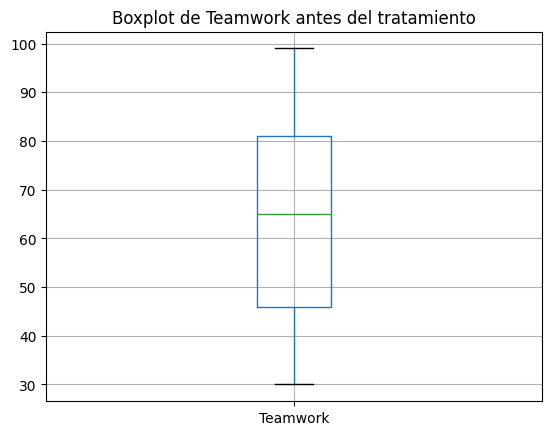

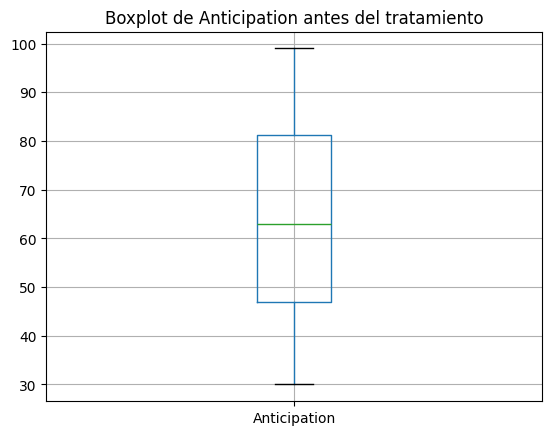

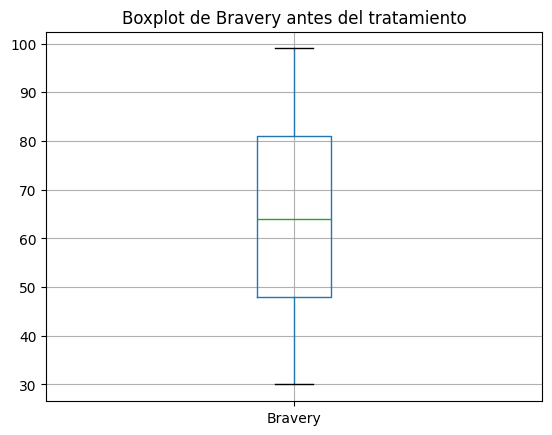

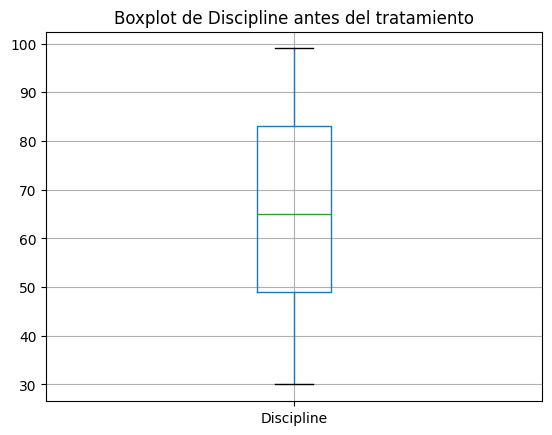

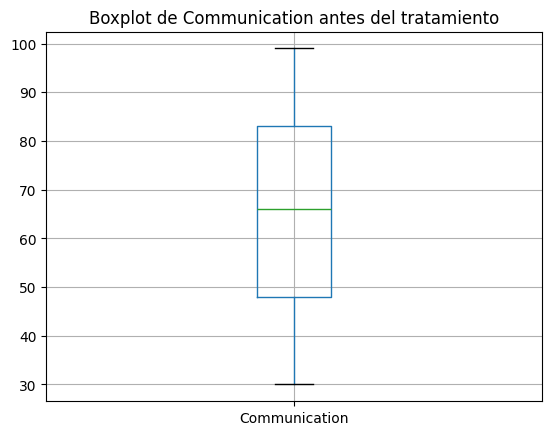

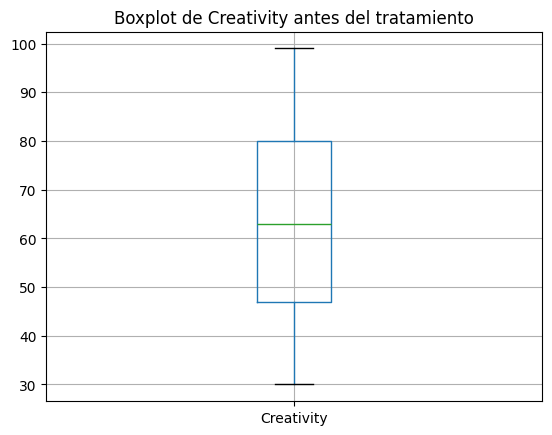

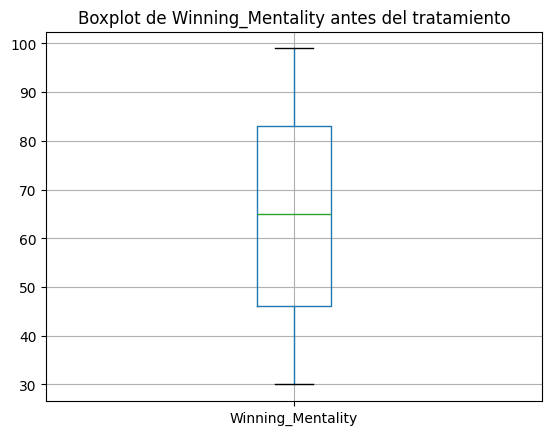

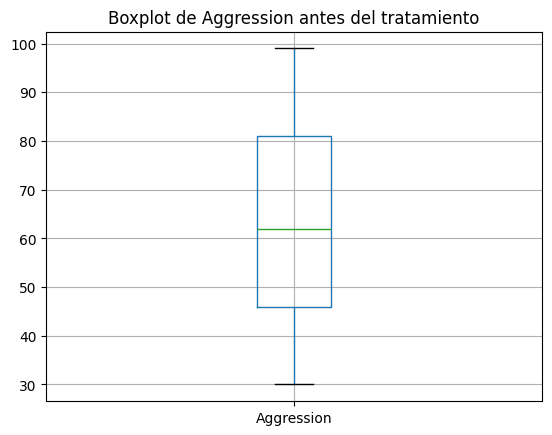

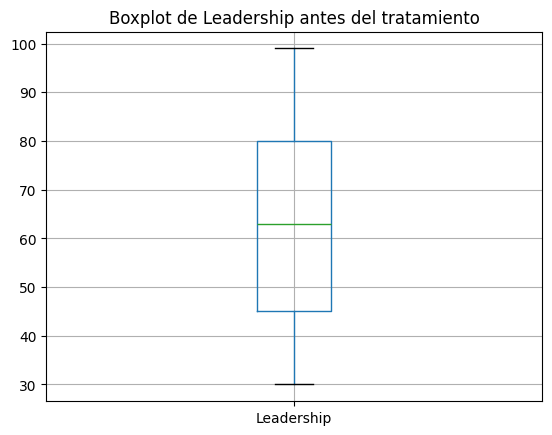

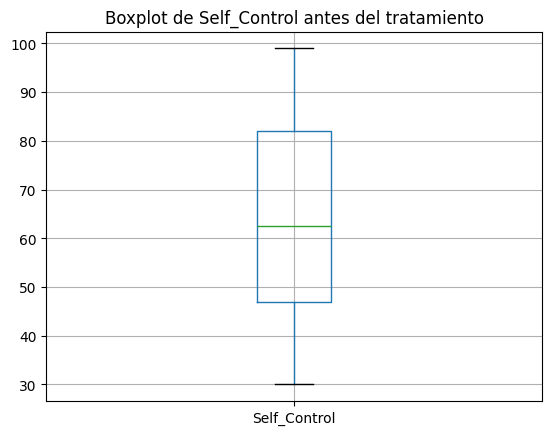

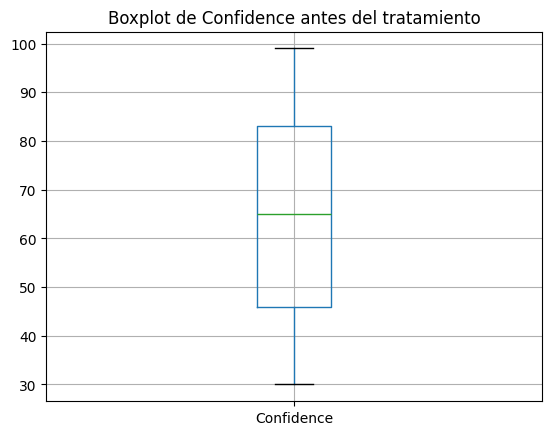

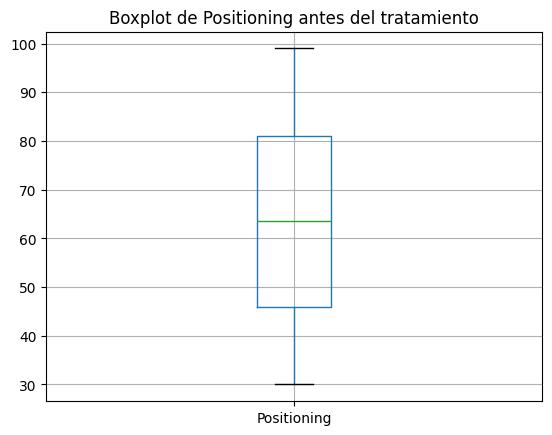

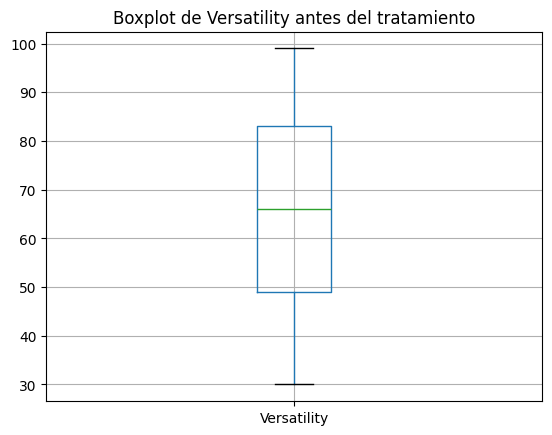

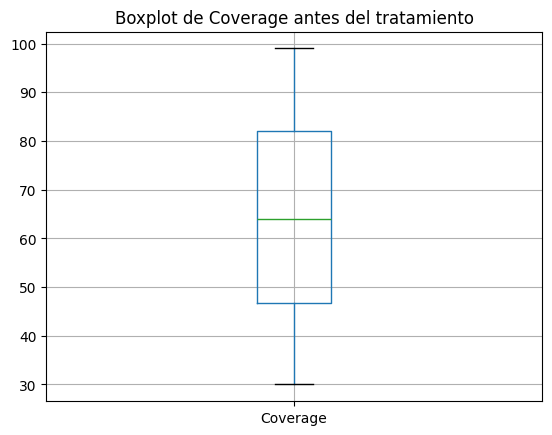

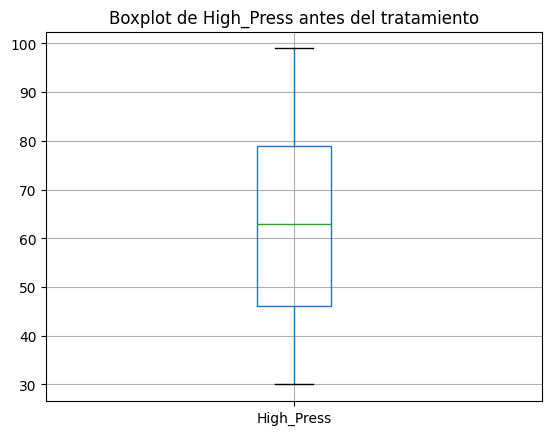

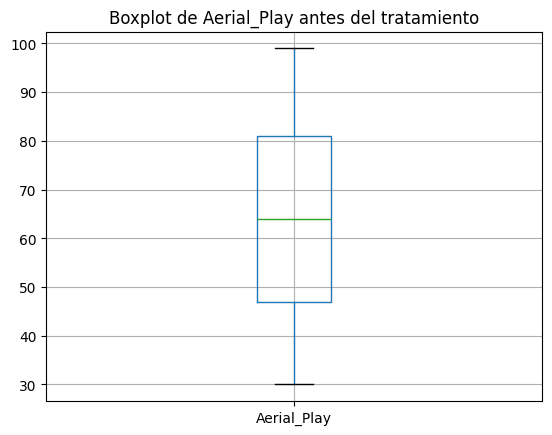

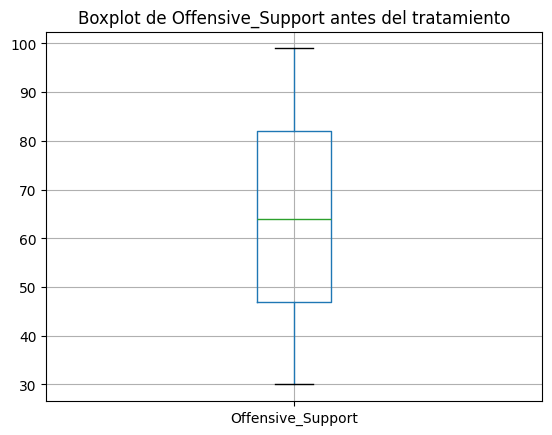

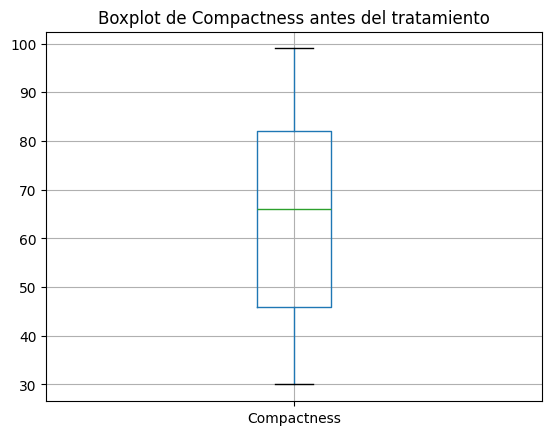

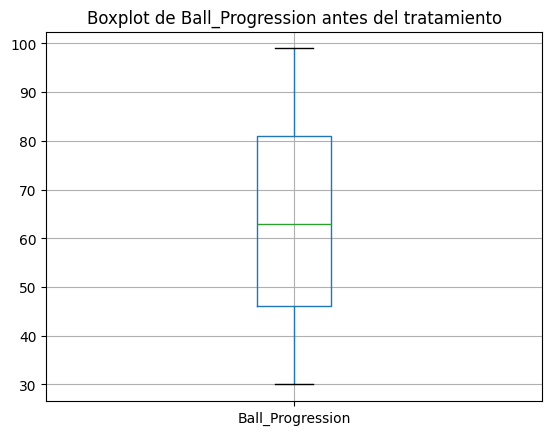

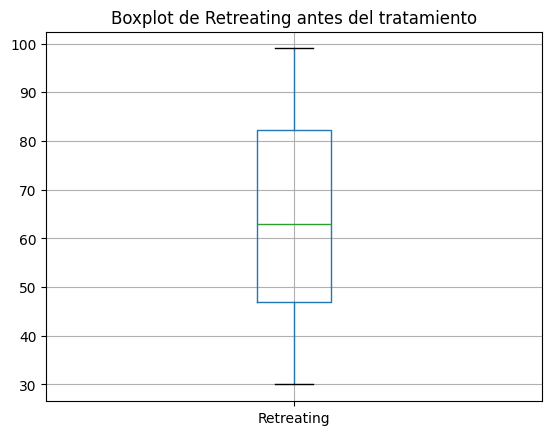

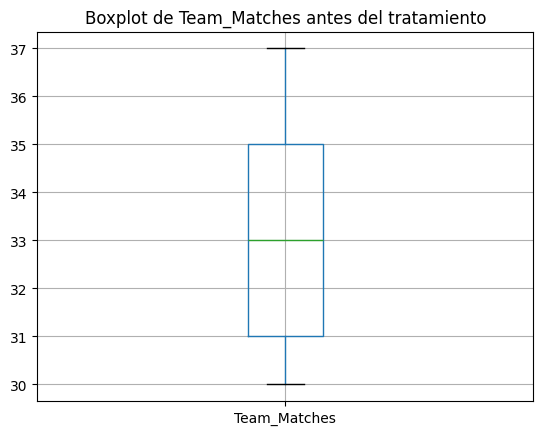

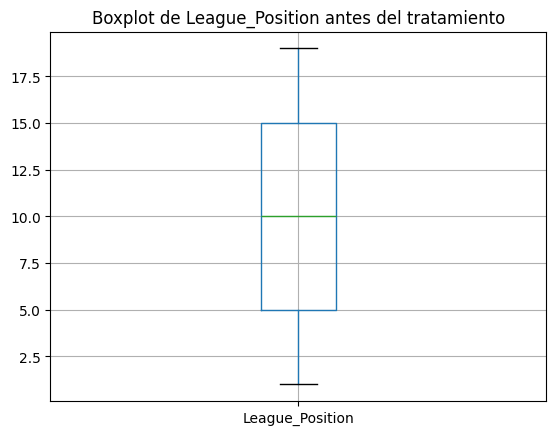

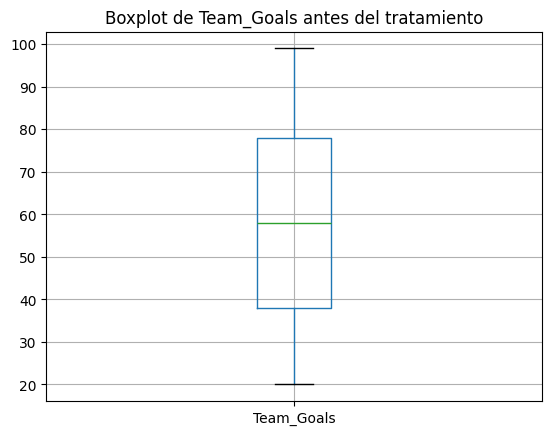

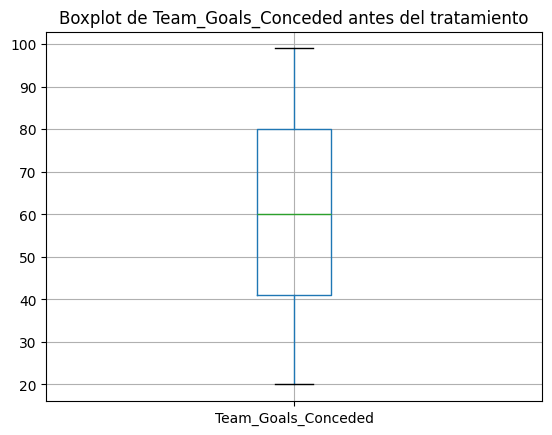

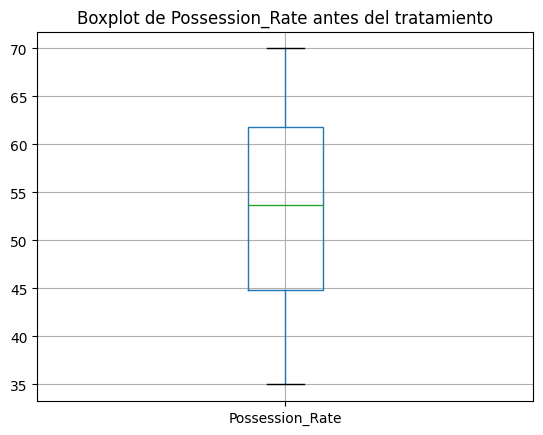

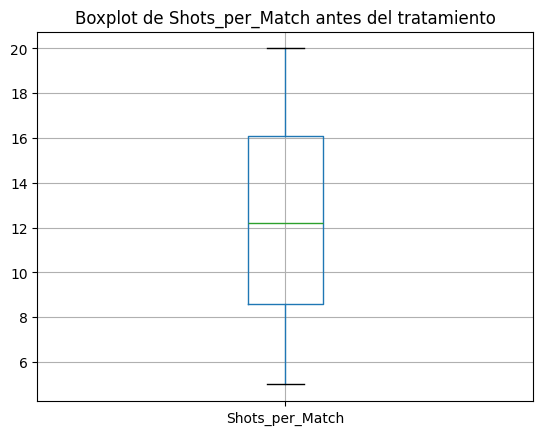

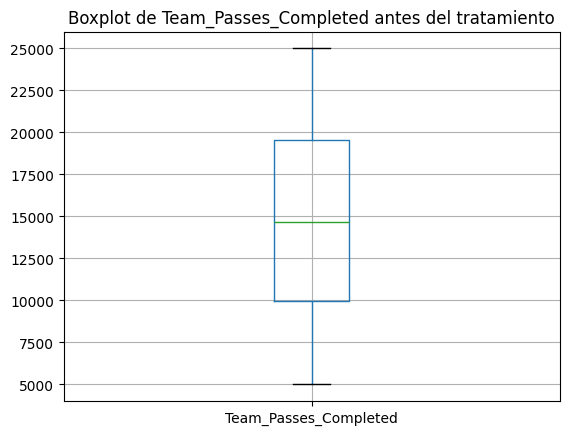

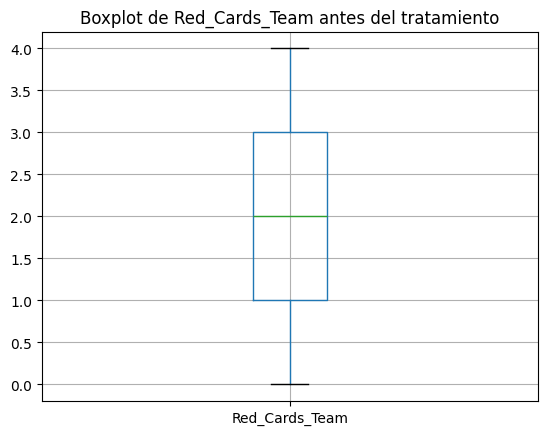

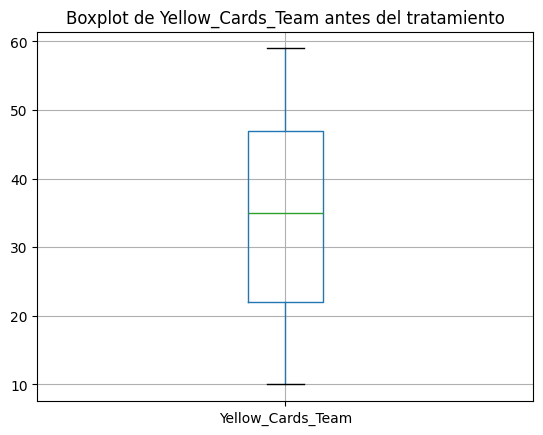

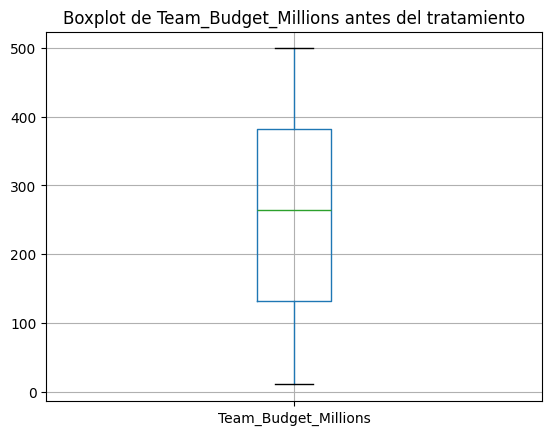

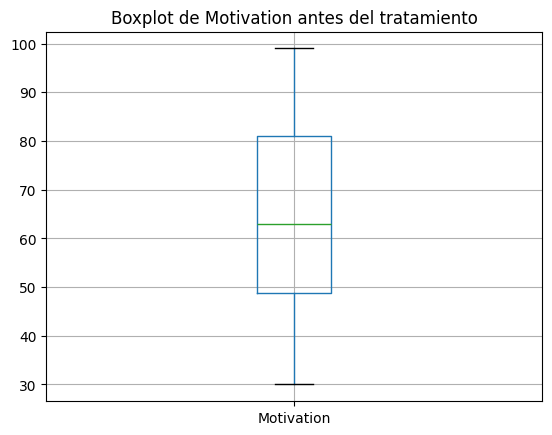

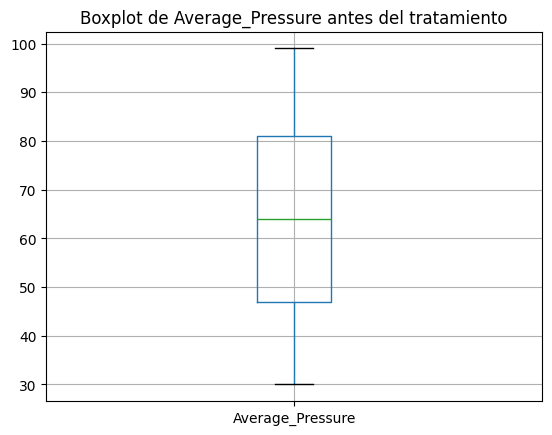

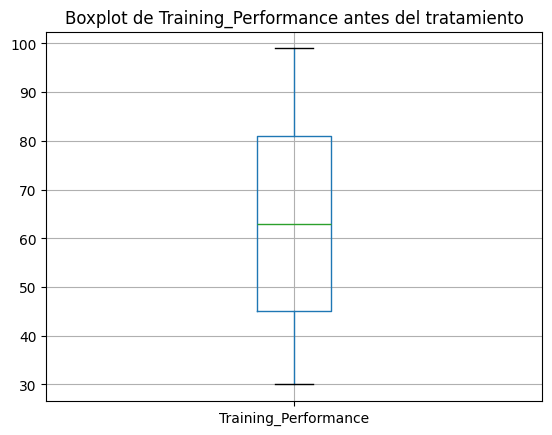

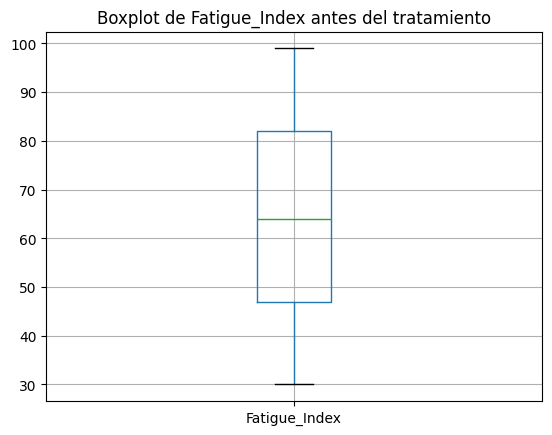

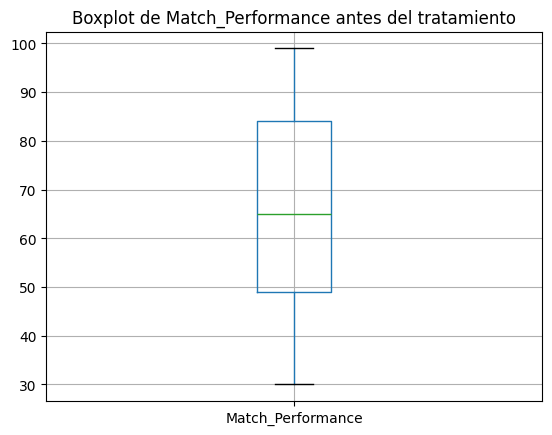

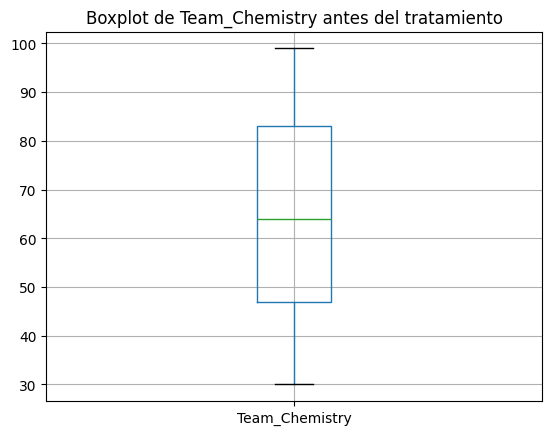

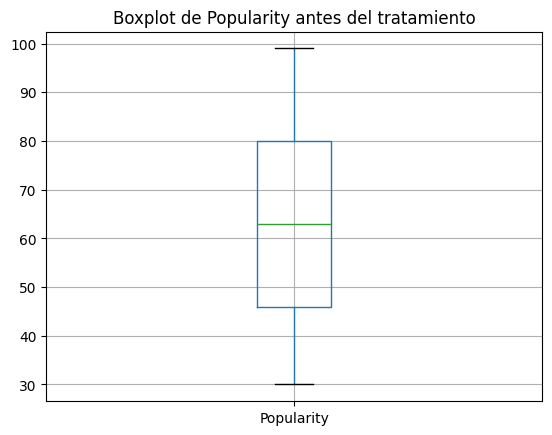

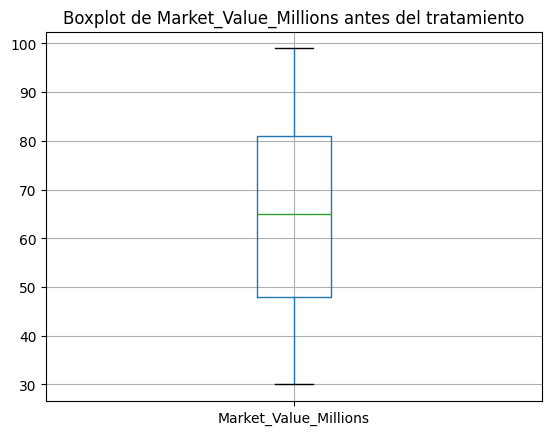

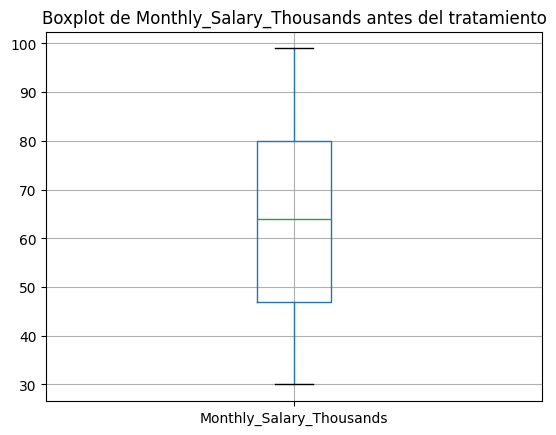

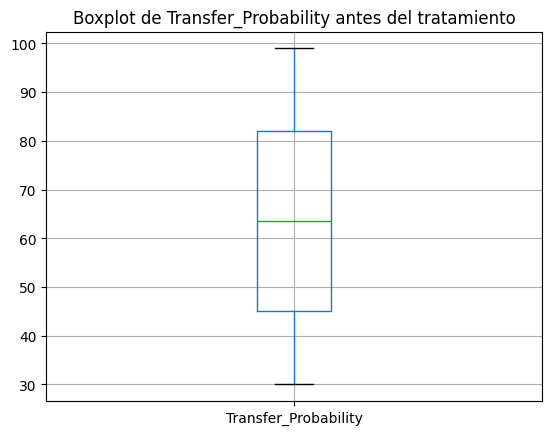

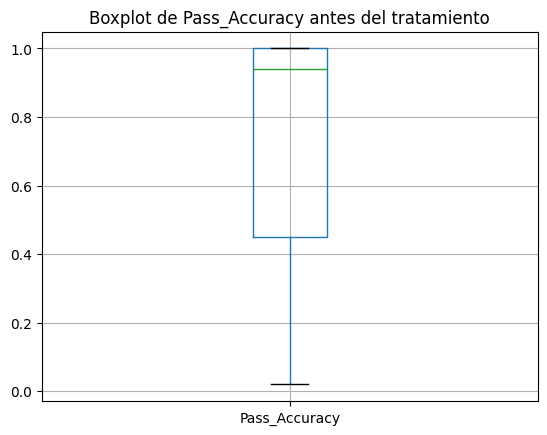

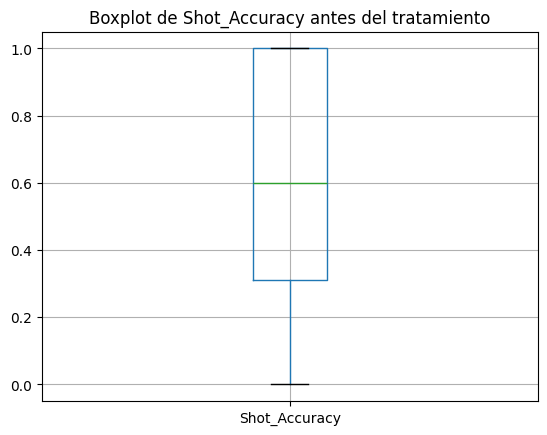

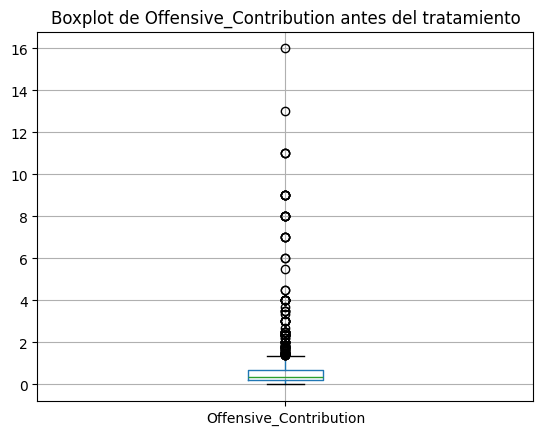

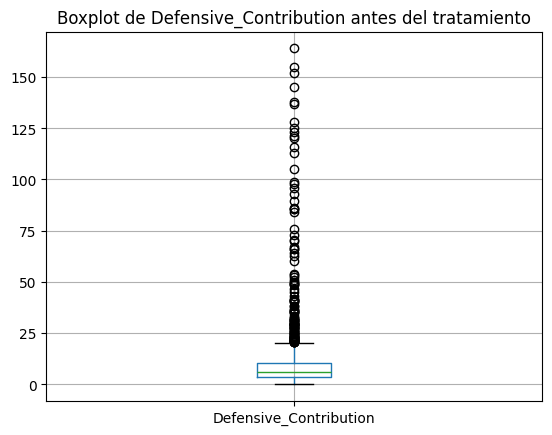

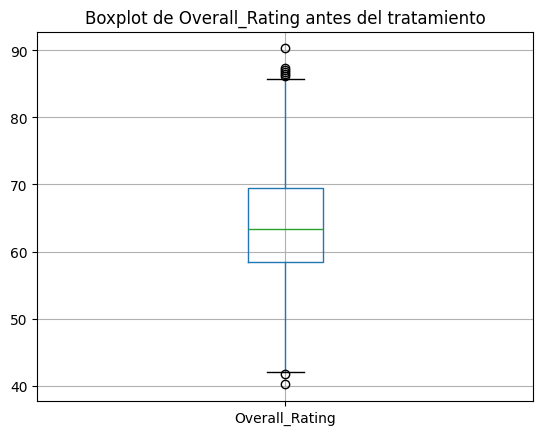

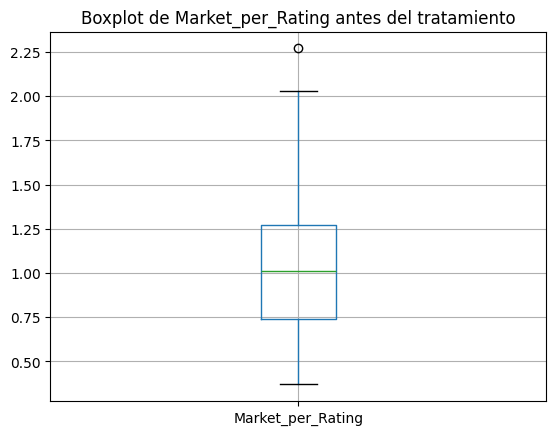

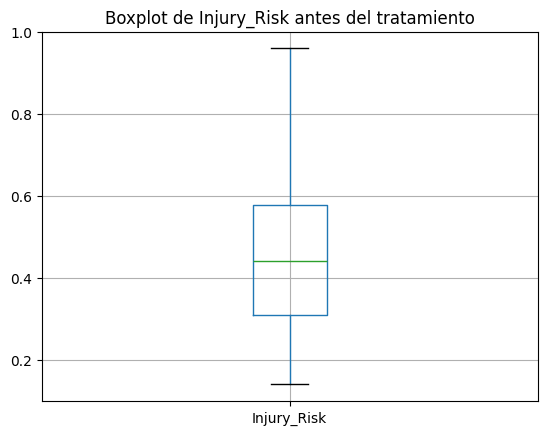

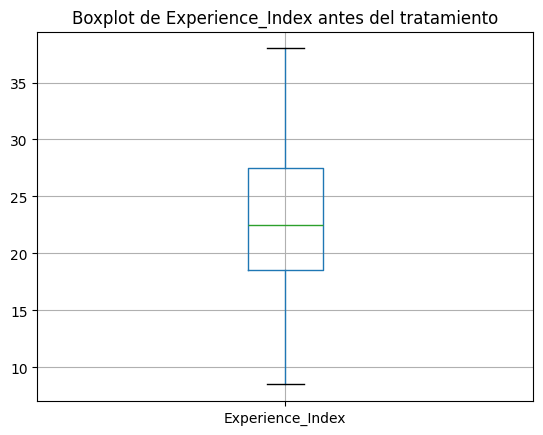

In [16]:
import matplotlib.pyplot as plt
print("Graficos boxplots antes del tratamiento")
numColsAntes = dfOriginal.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numColsAntes:
    plt.figure()
    dfOriginal.boxplot(column=col)
    plt.title(f'Boxplot de {col} antes del tratamiento')
    plt.show()

Graficos boxplots después del tratamiento


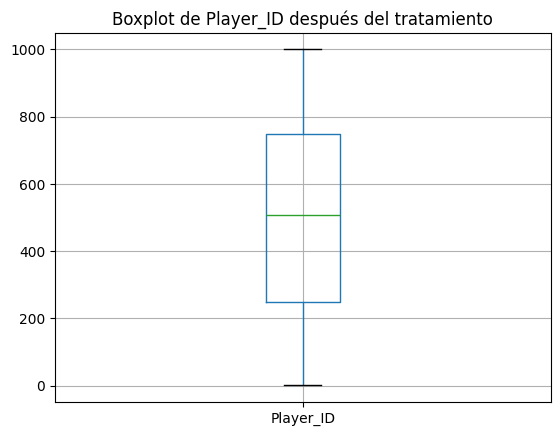

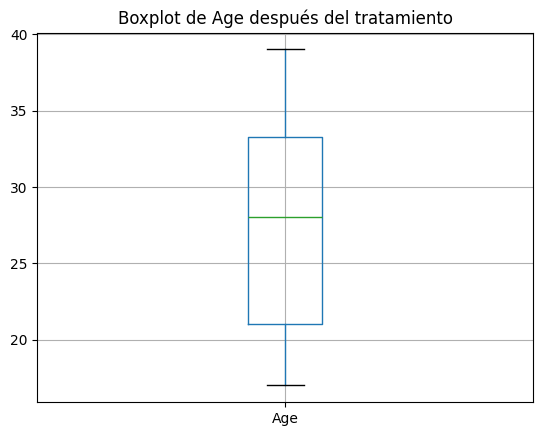

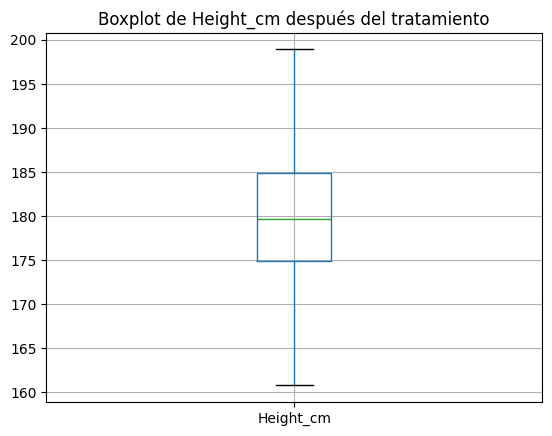

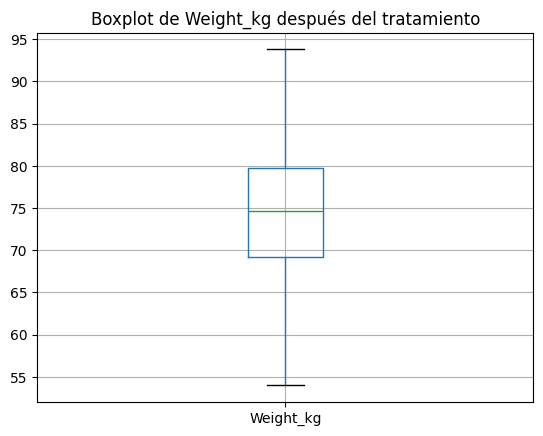

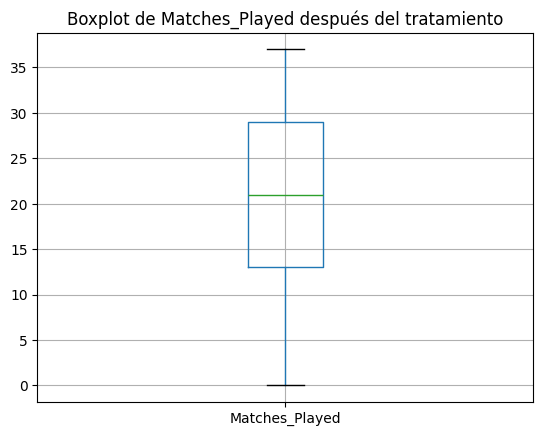

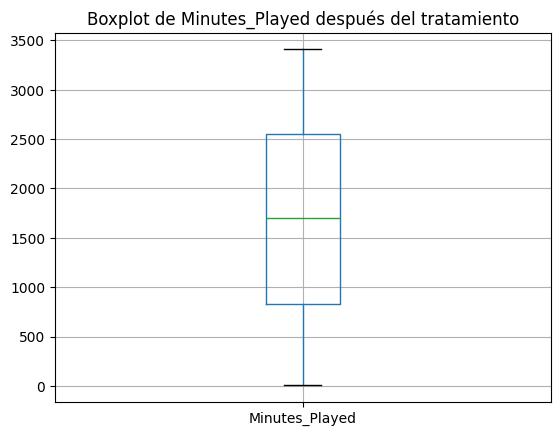

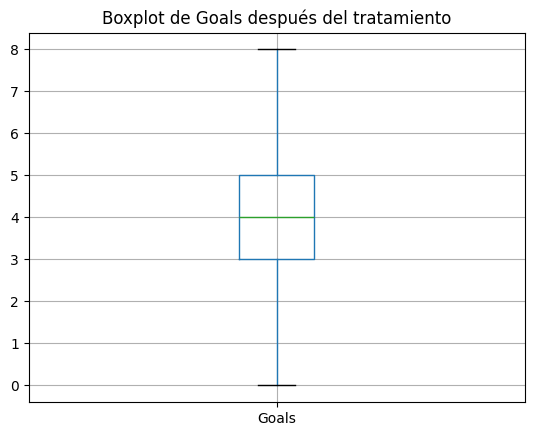

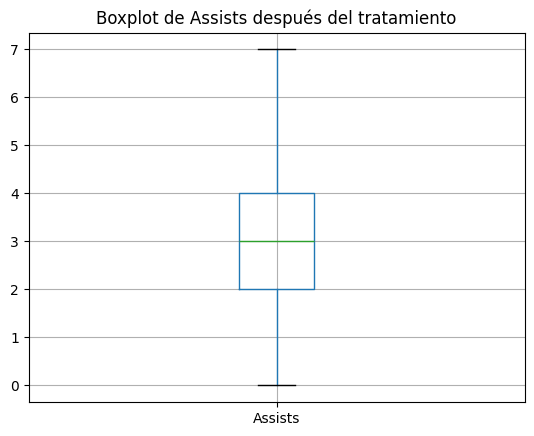

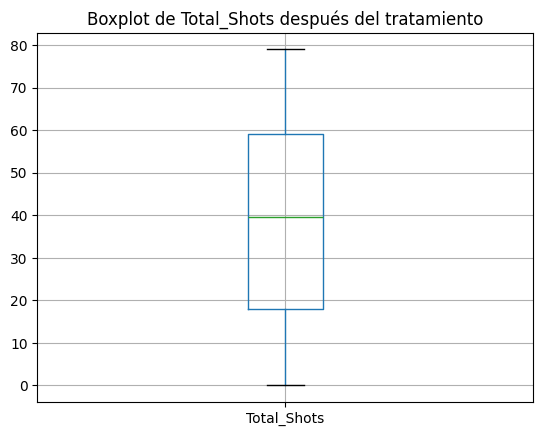

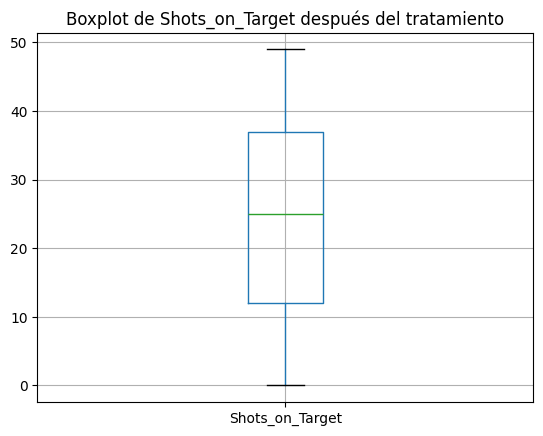

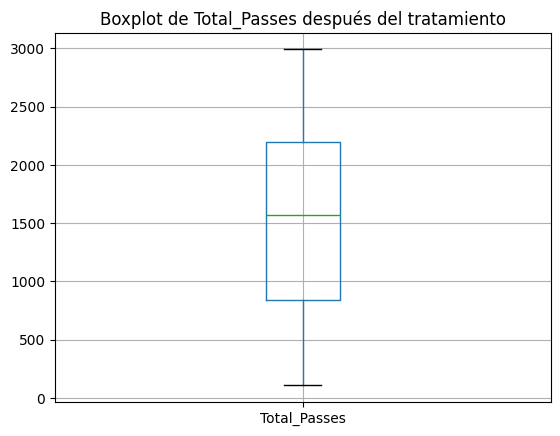

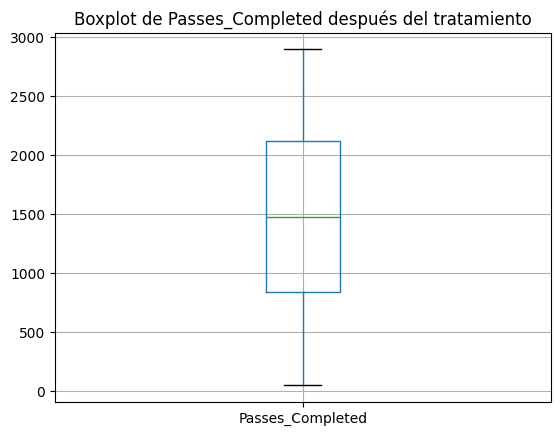

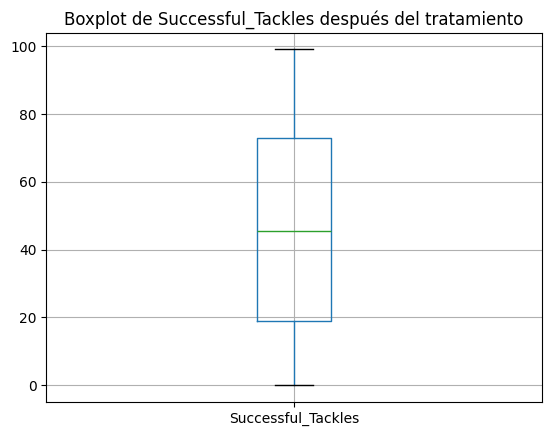

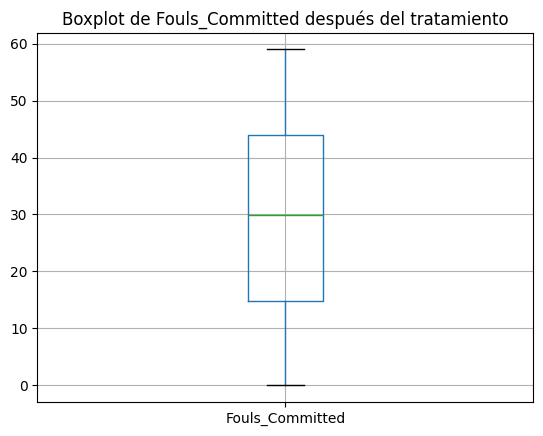

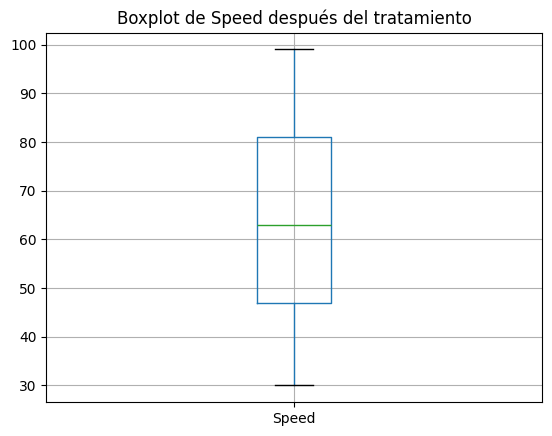

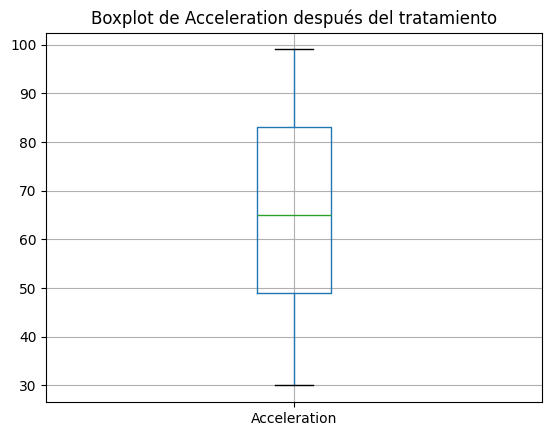

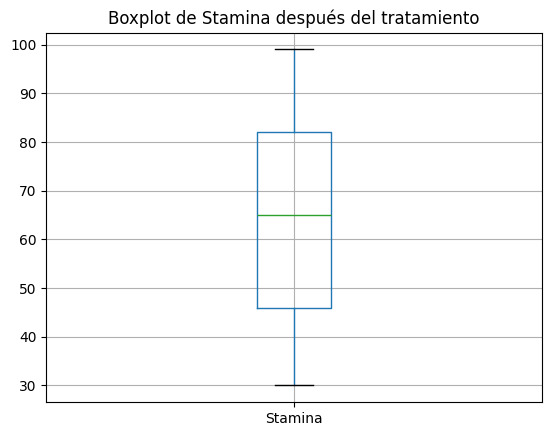

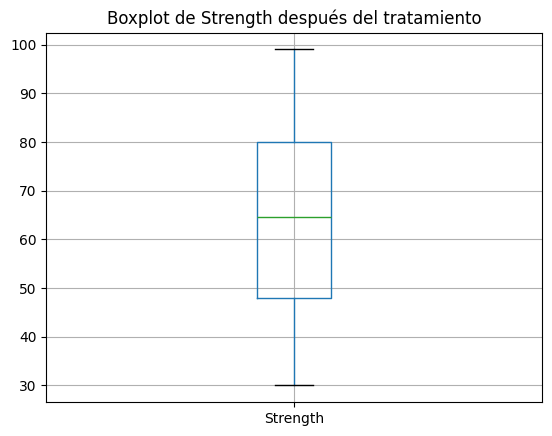

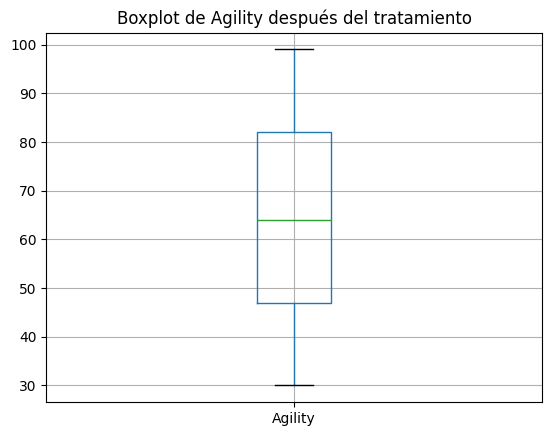

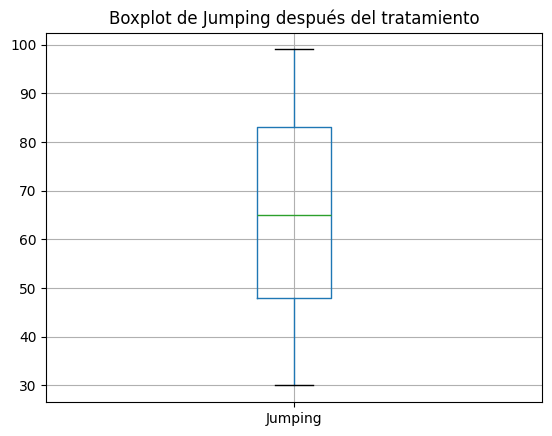

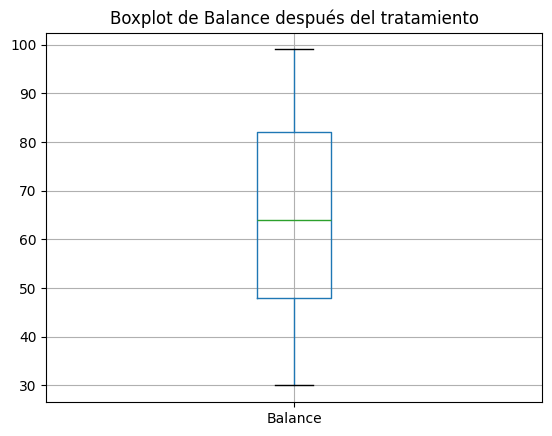

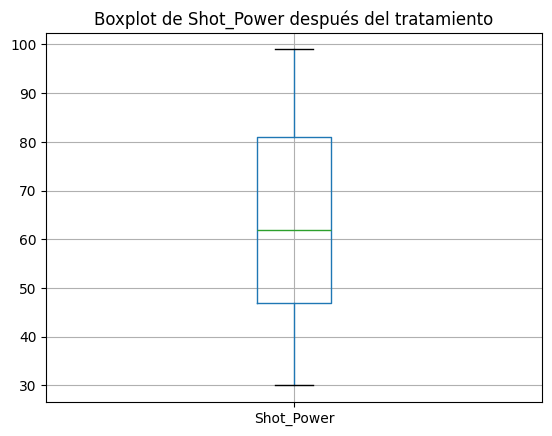

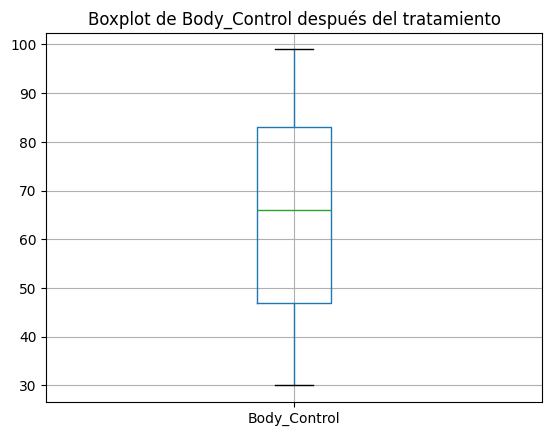

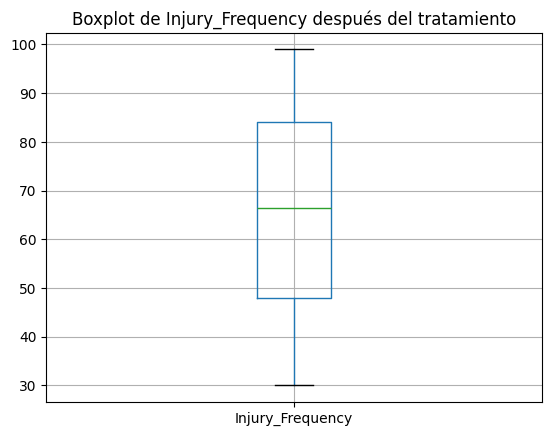

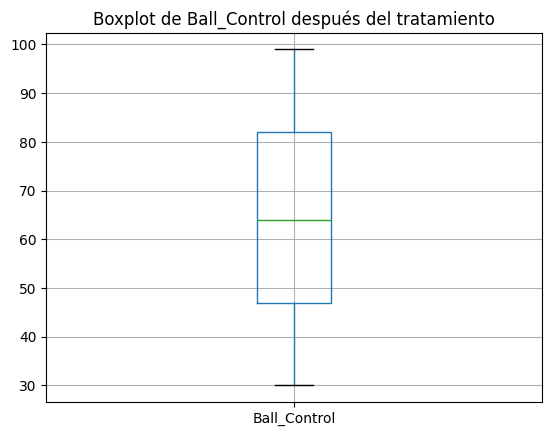

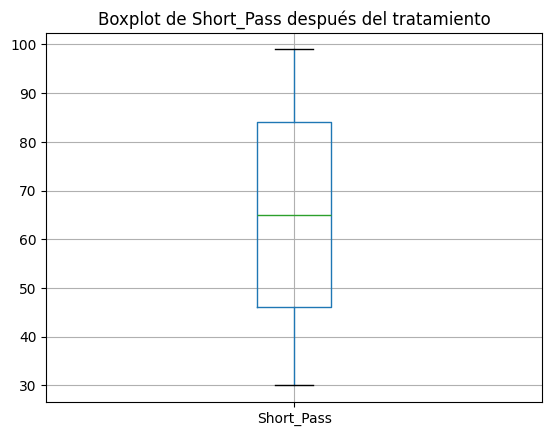

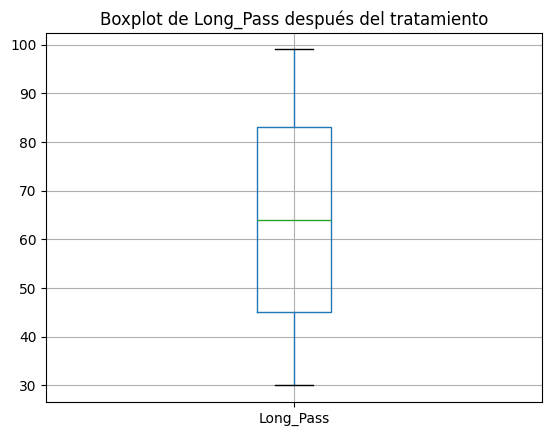

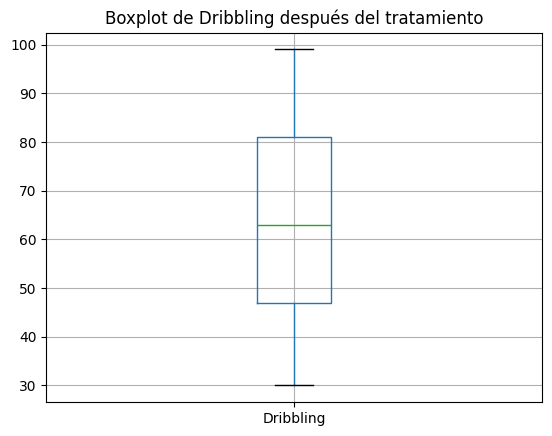

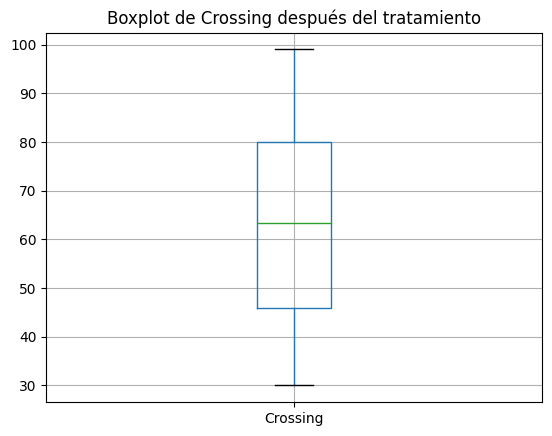

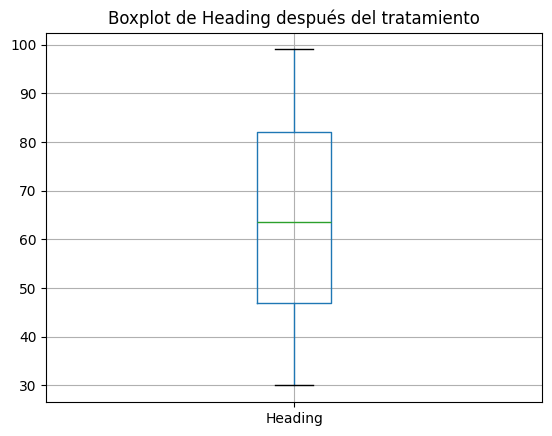

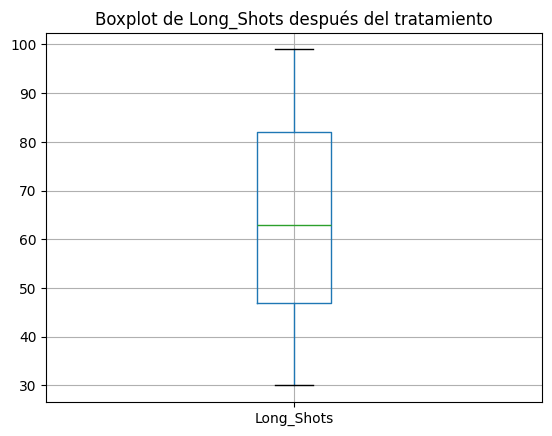

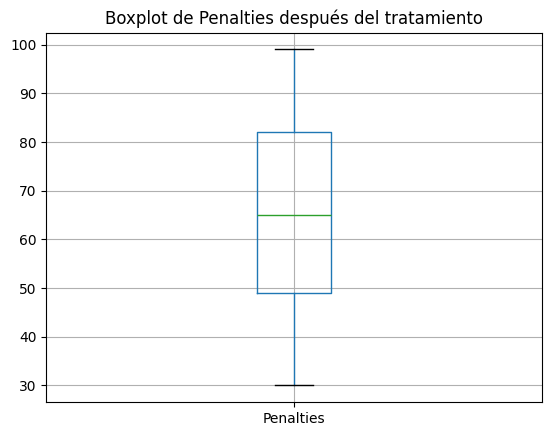

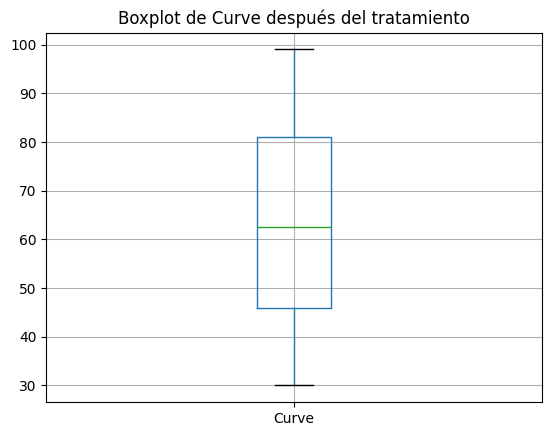

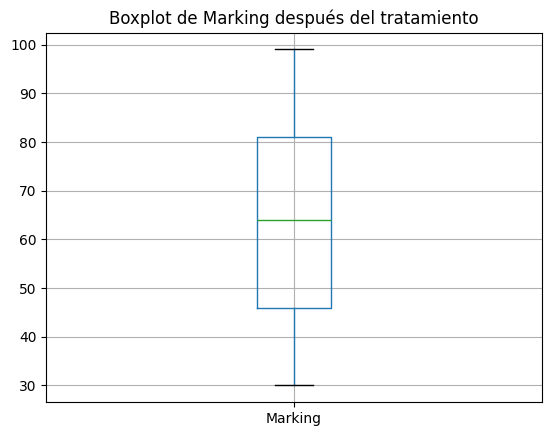

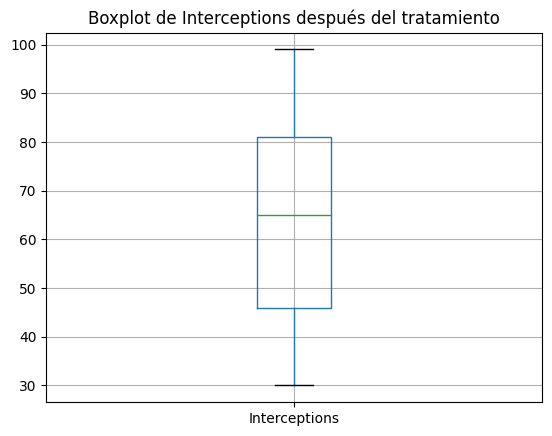

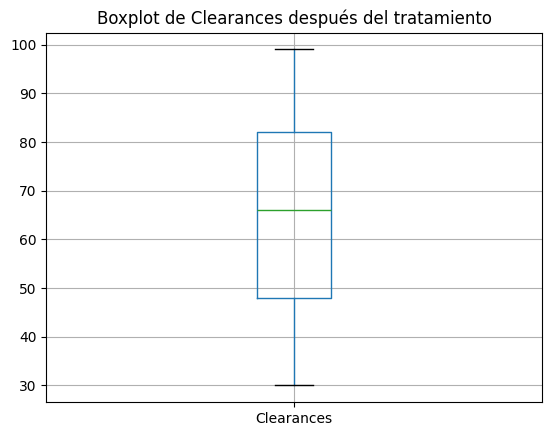

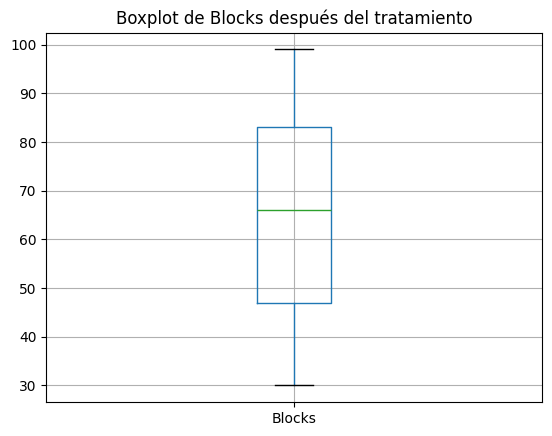

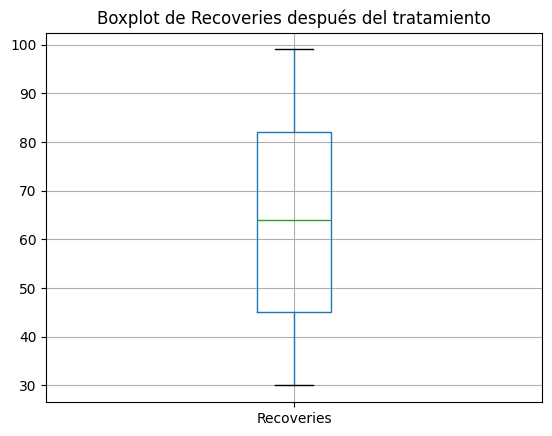

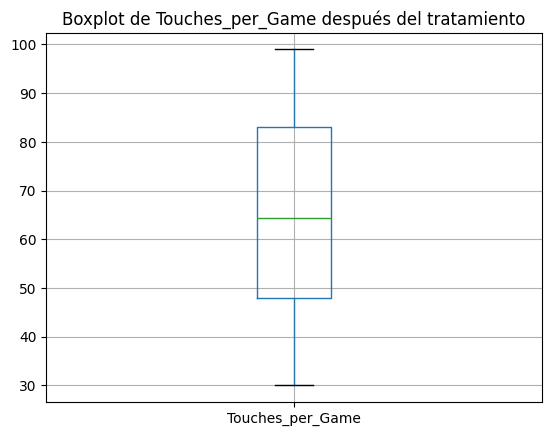

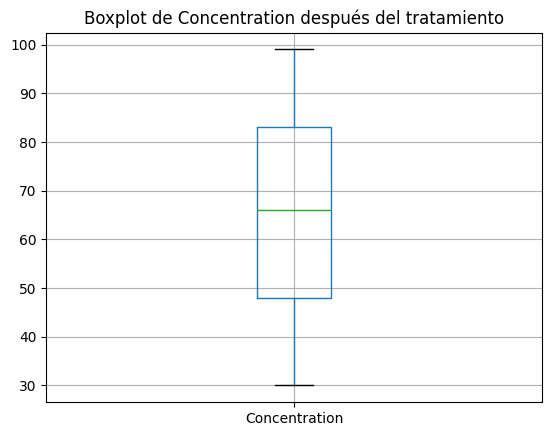

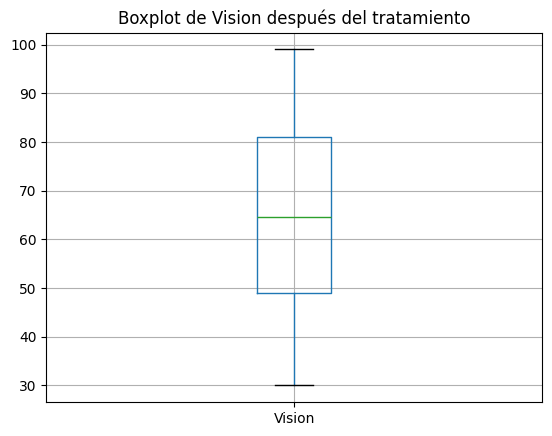

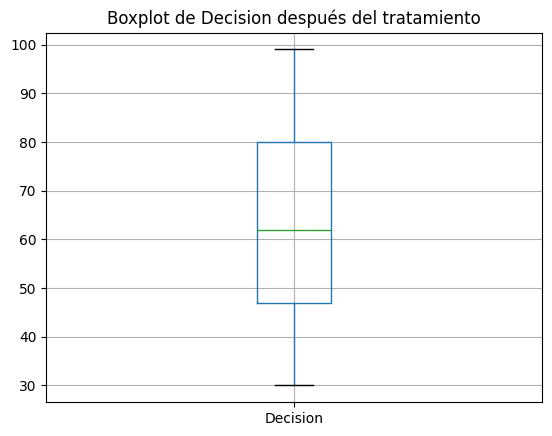

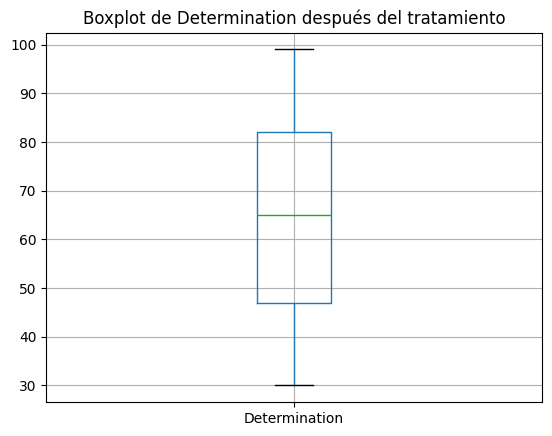

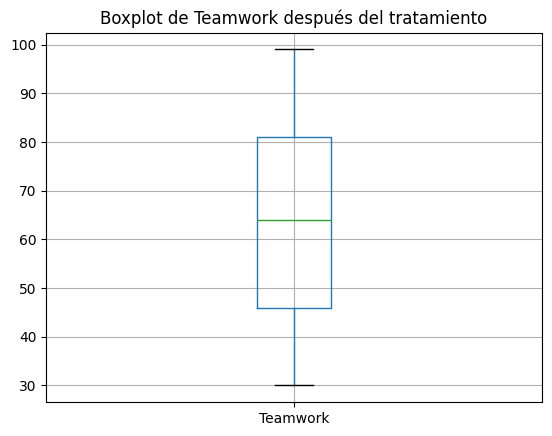

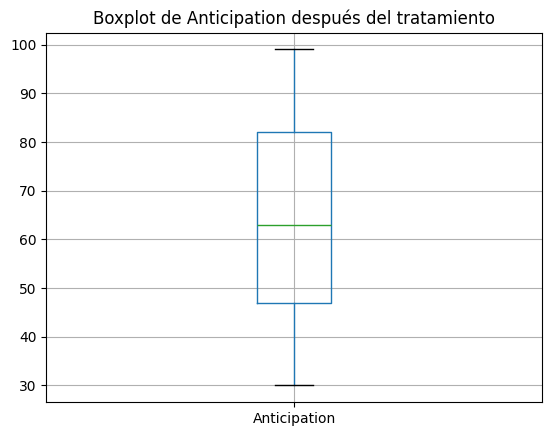

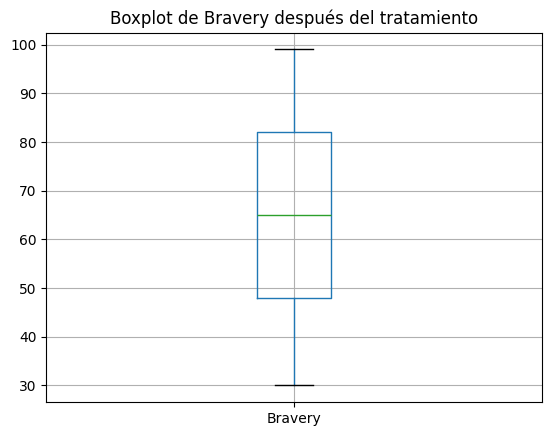

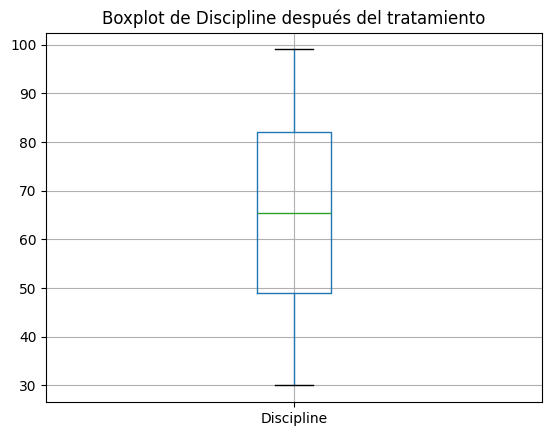

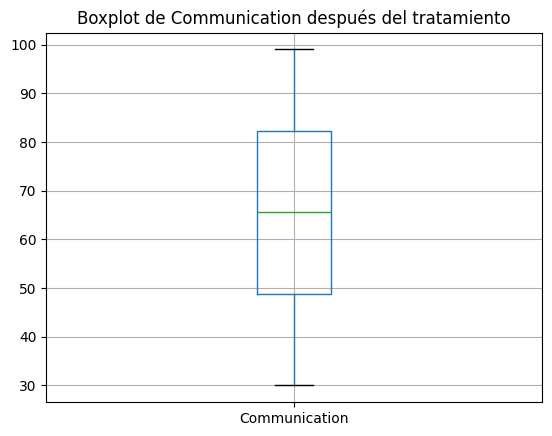

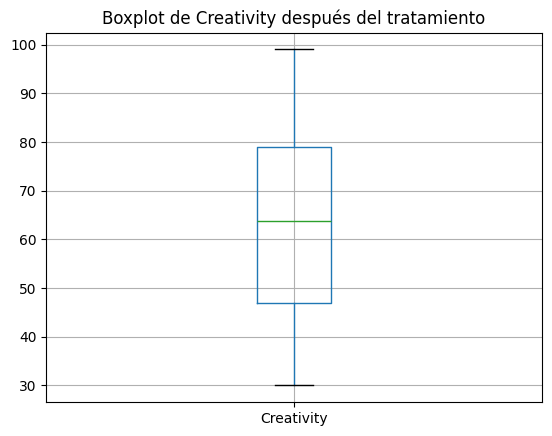

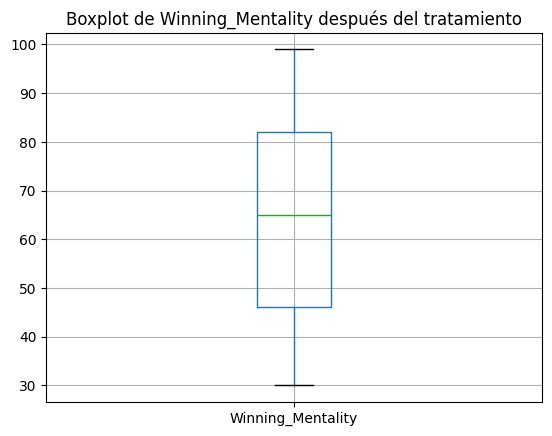

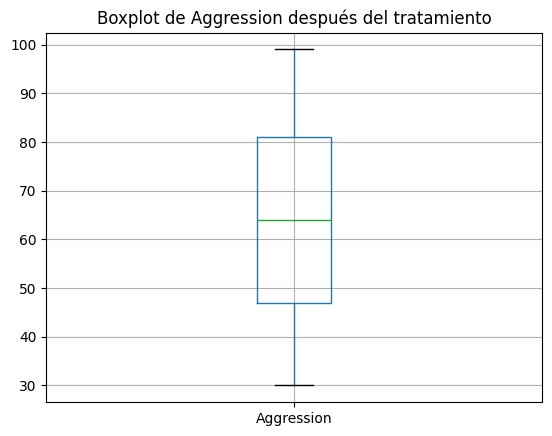

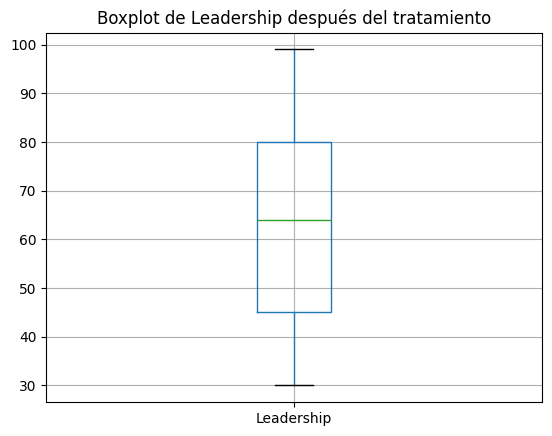

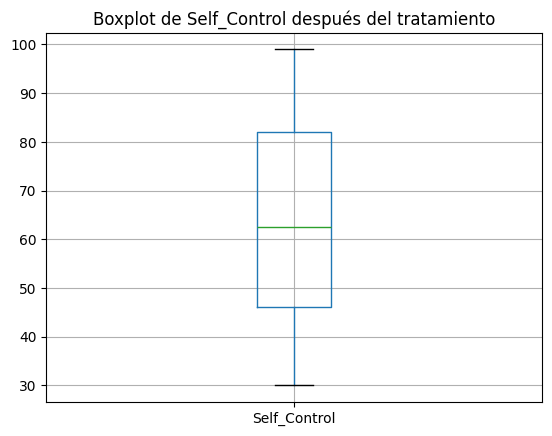

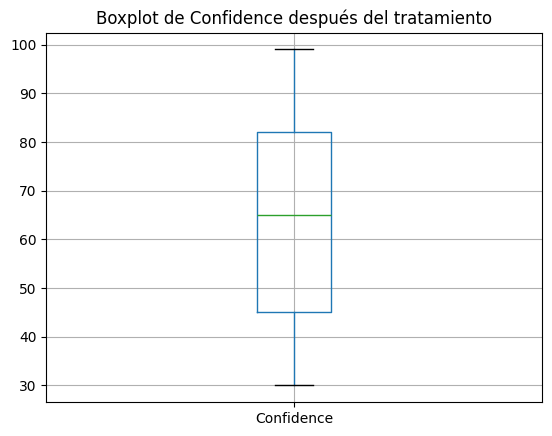

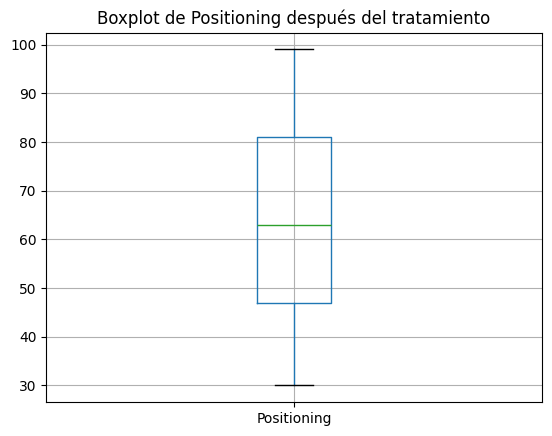

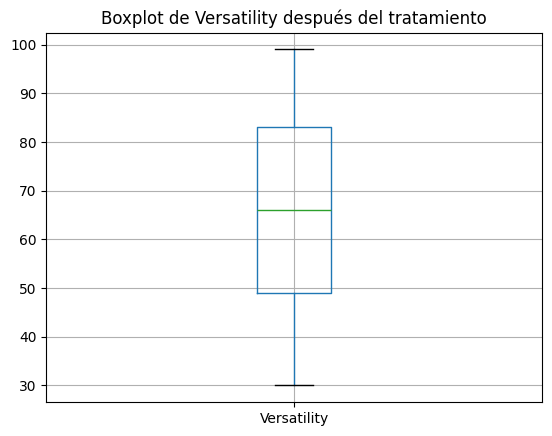

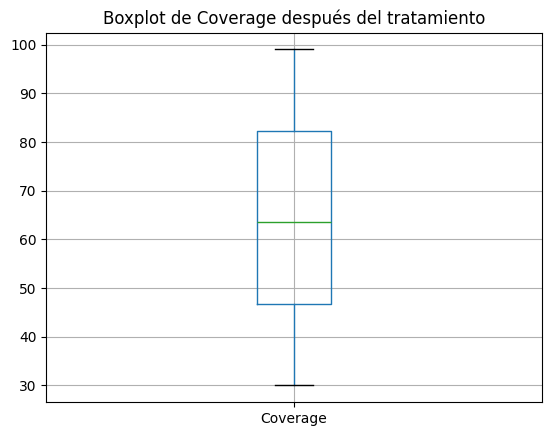

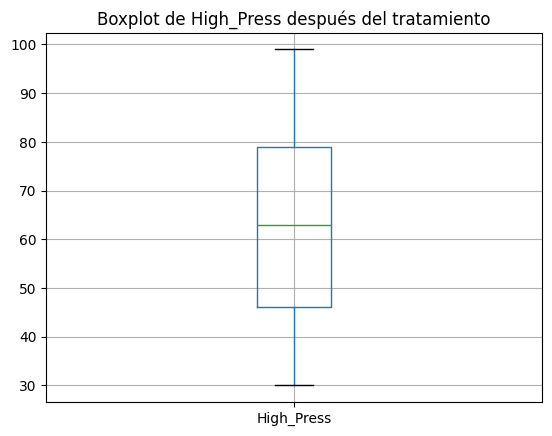

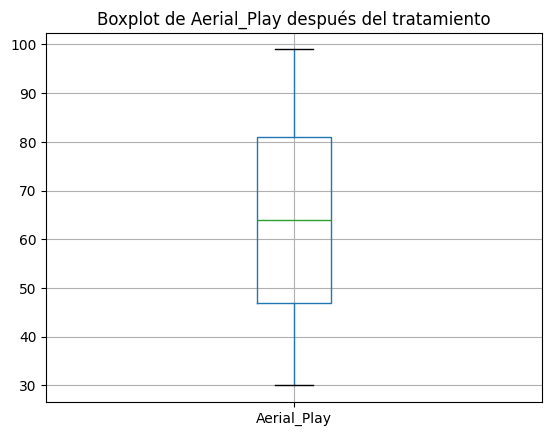

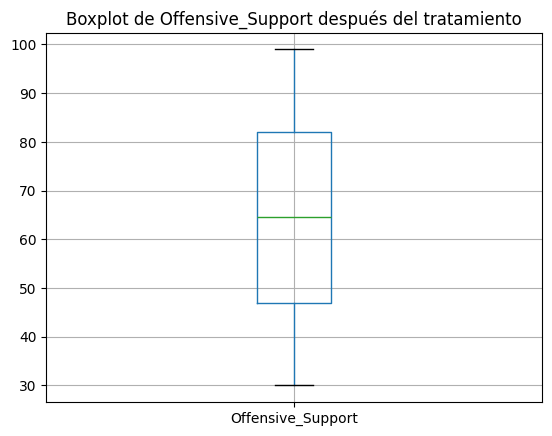

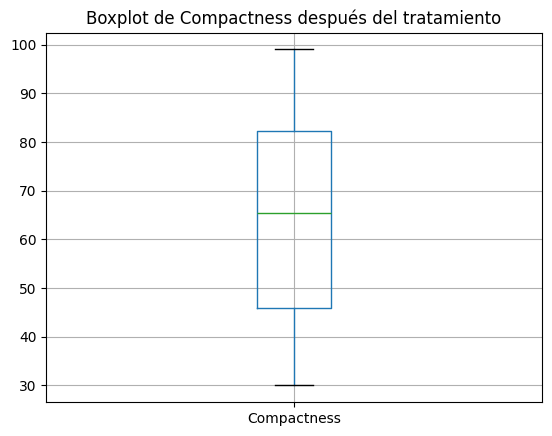

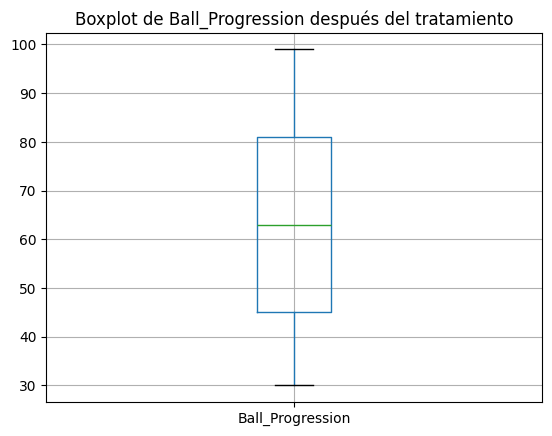

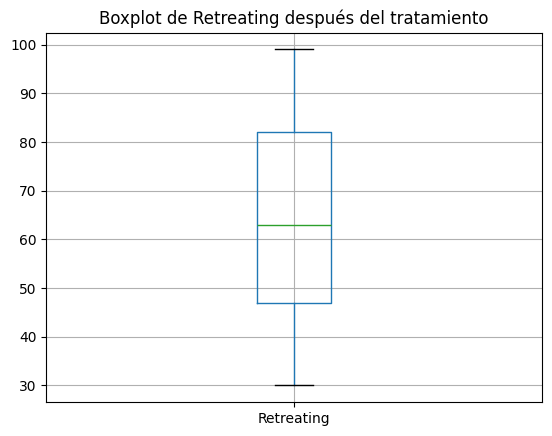

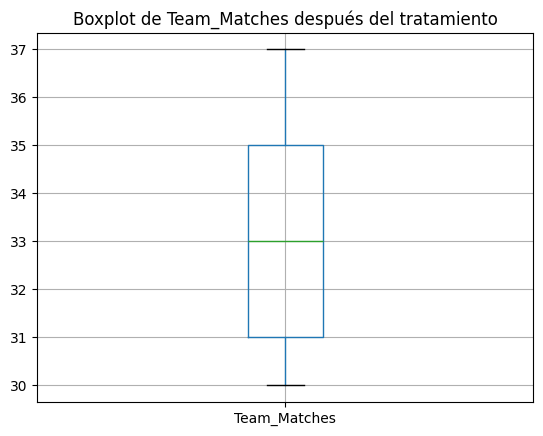

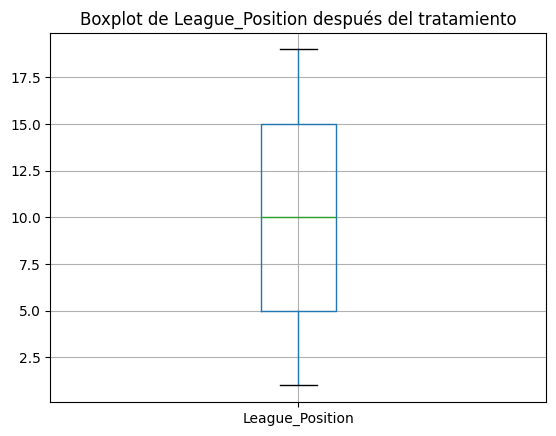

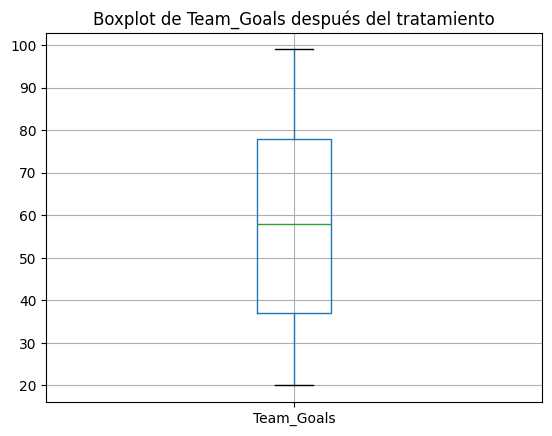

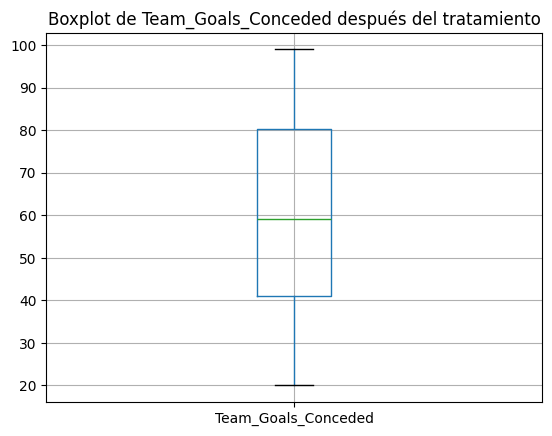

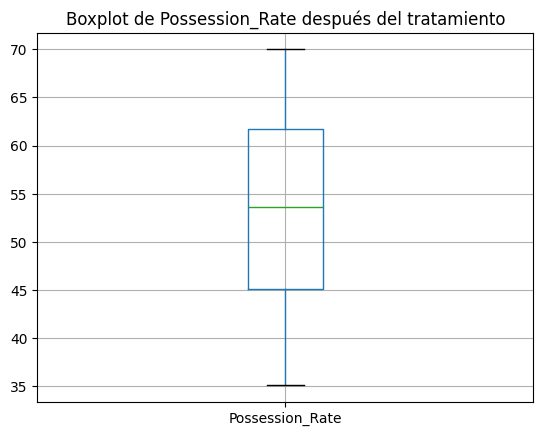

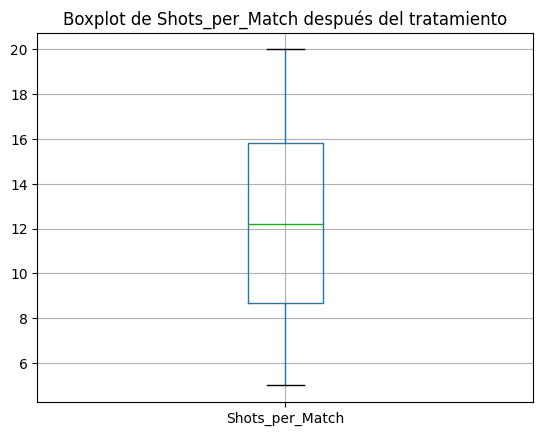

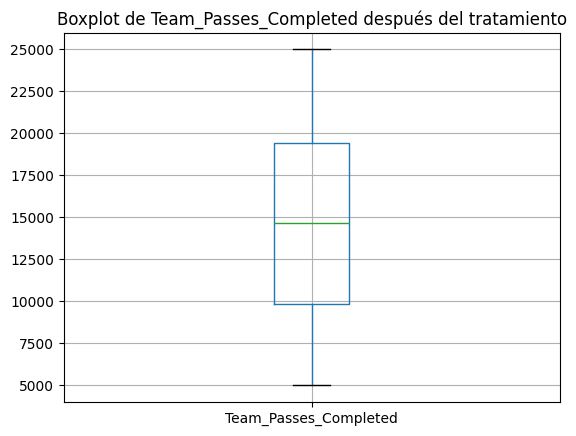

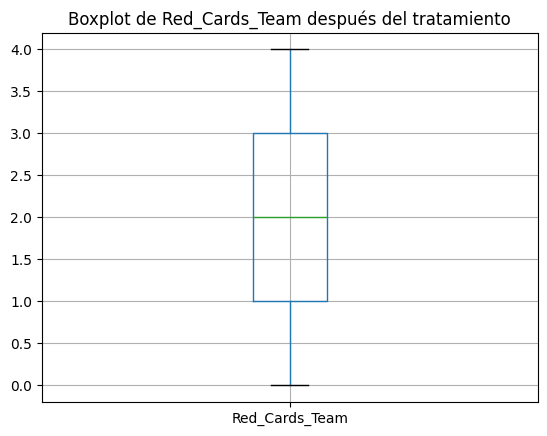

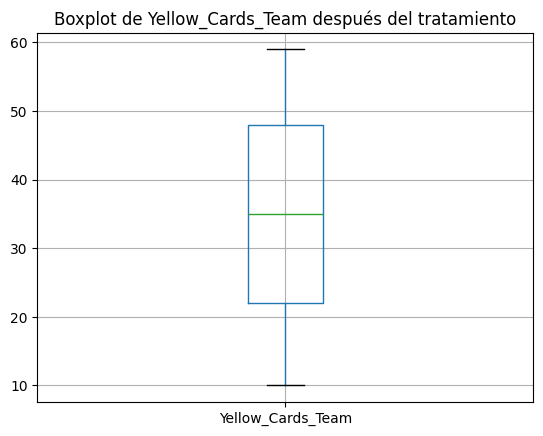

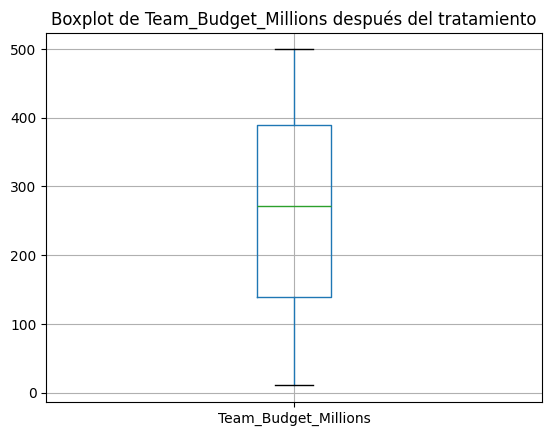

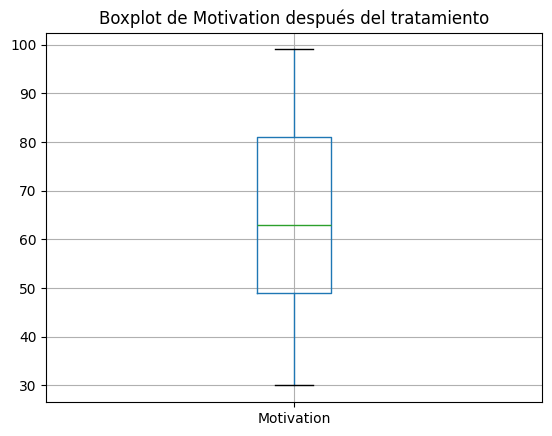

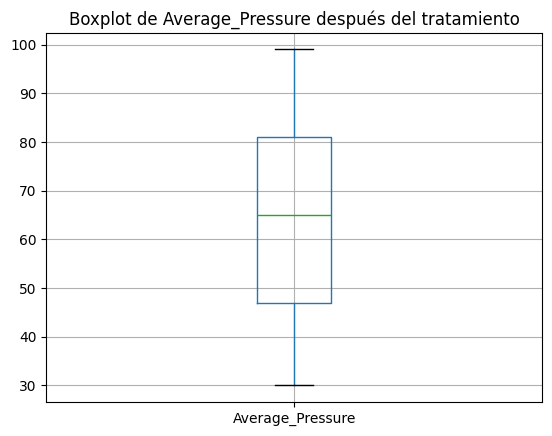

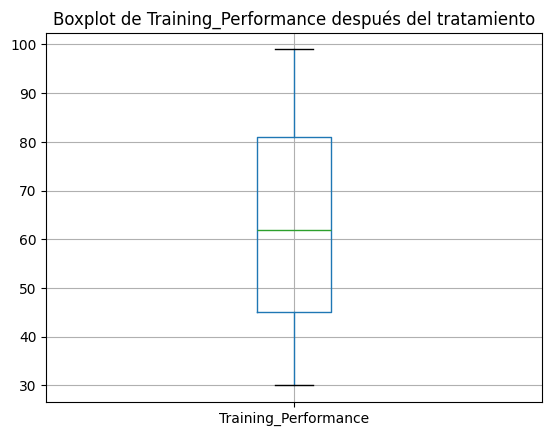

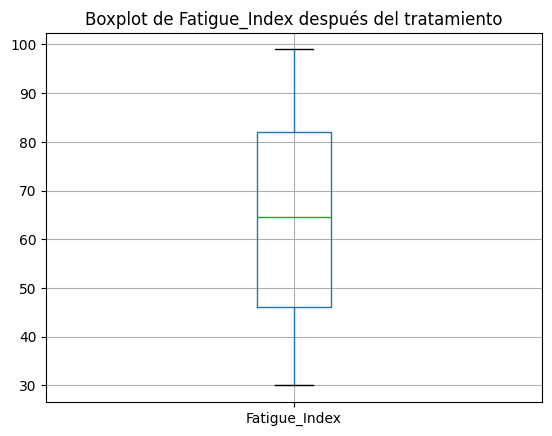

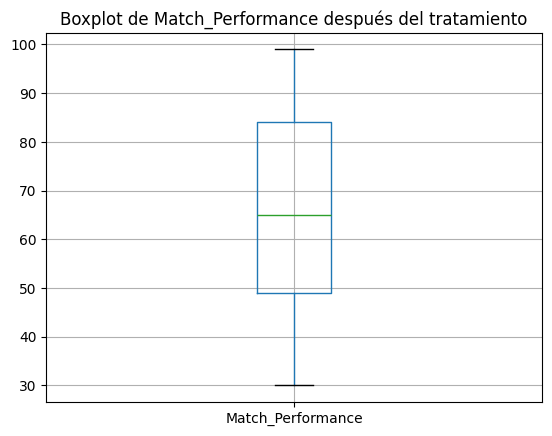

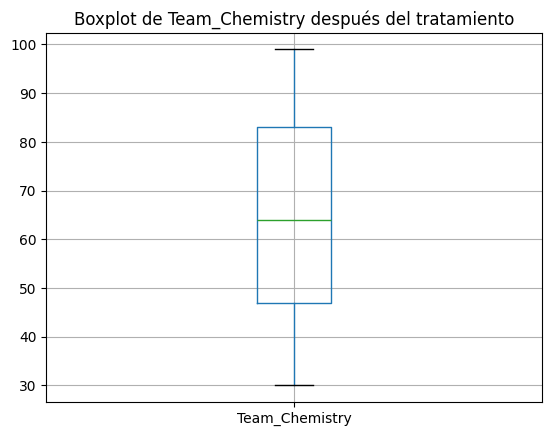

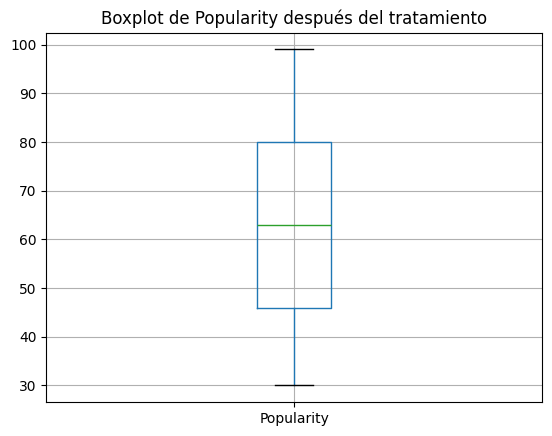

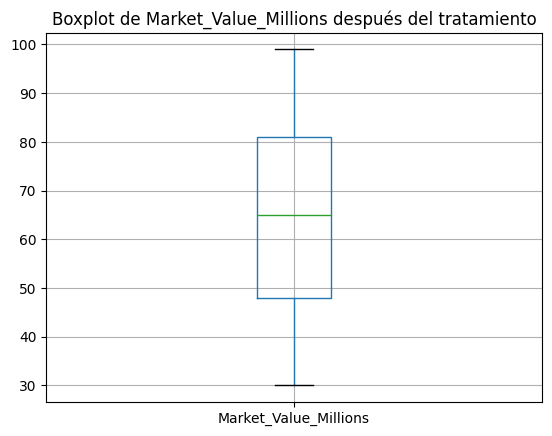

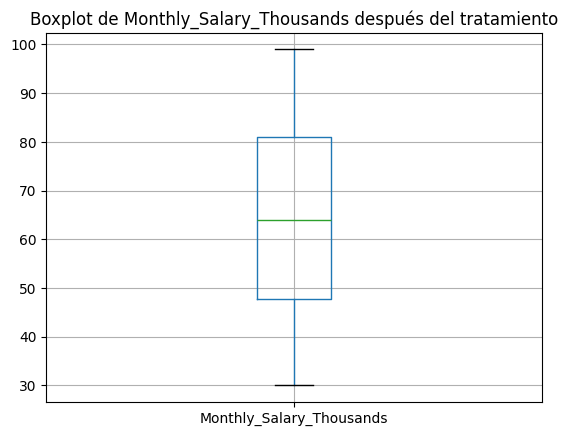

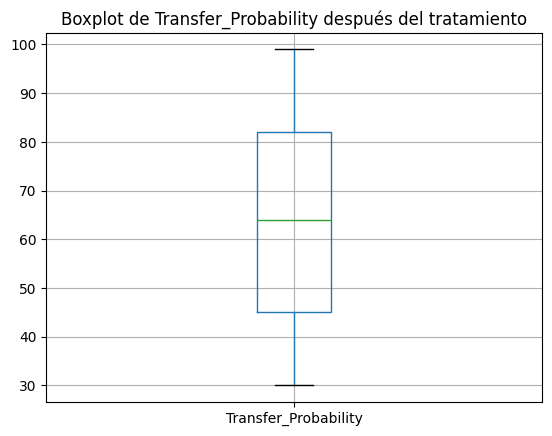

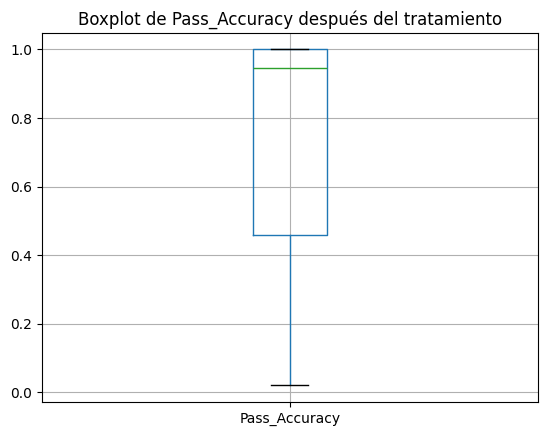

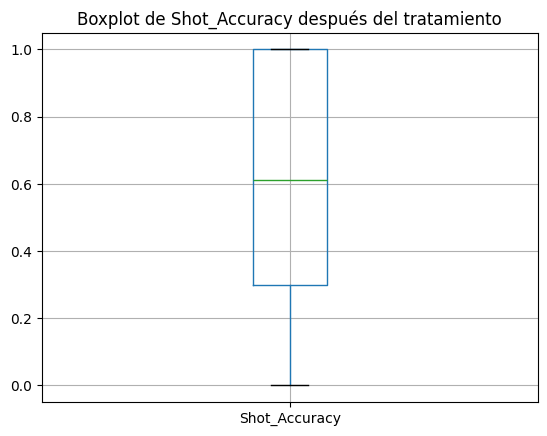

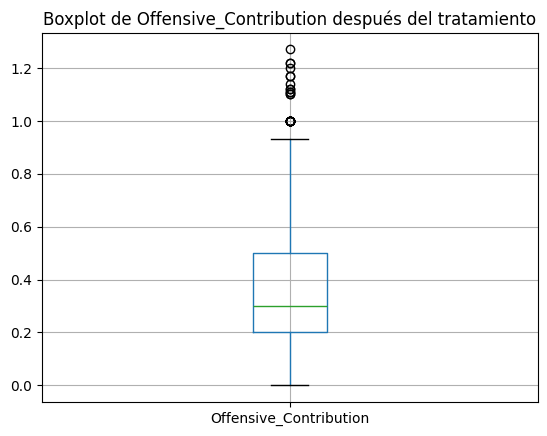

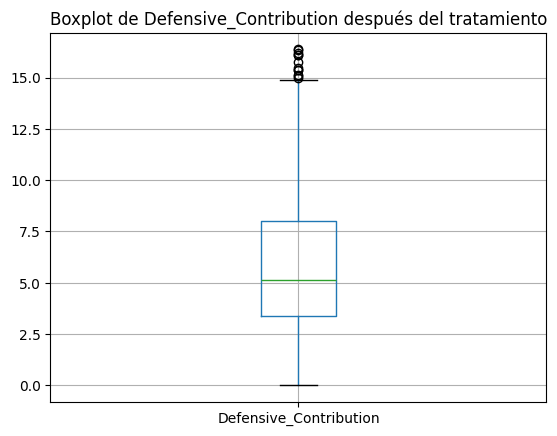

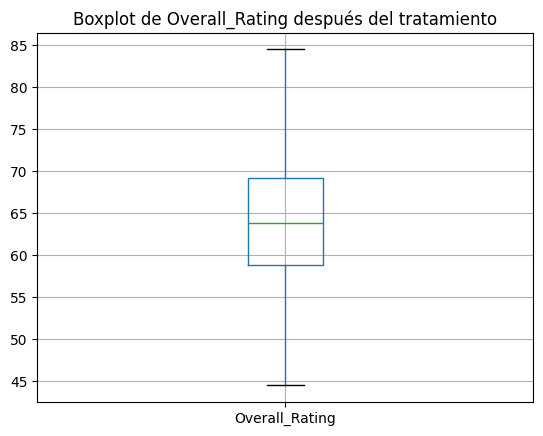

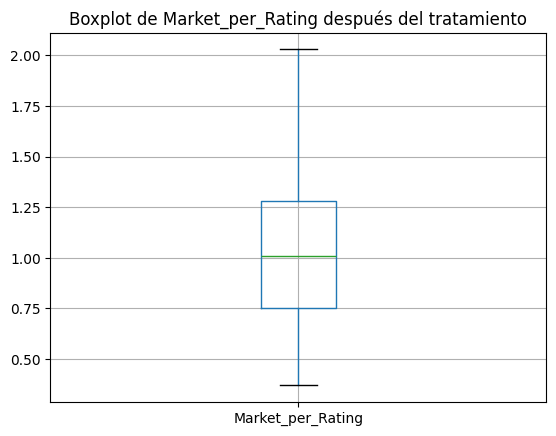

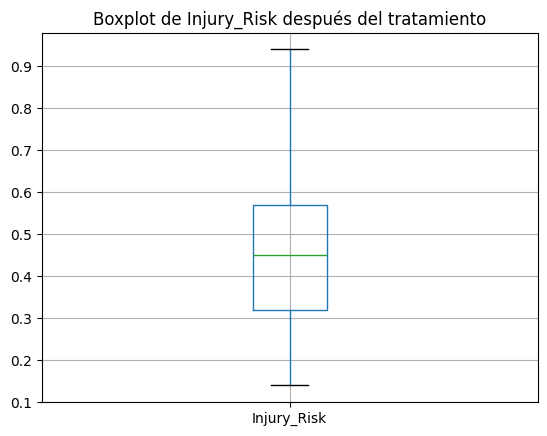

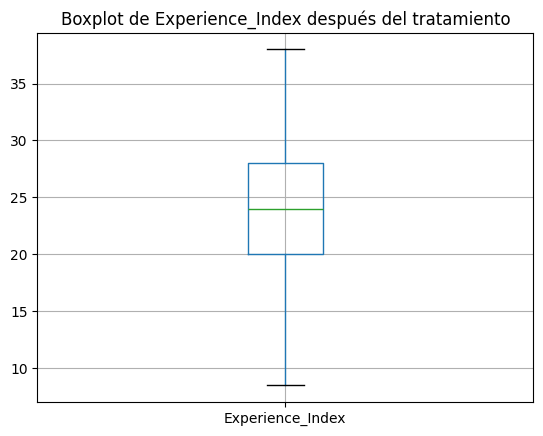

In [17]:
print("Graficos boxplots después del tratamiento")
numColsDespues = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numColsDespues:
    plt.figure()
    dfSinOutliers.boxplot(column=col)
    plt.title(f'Boxplot de {col} después del tratamiento')
    plt.show()

3. Ejercicio: crea una función `iqr_outliers(df, columna)` que devuelva límites
inferior y superior.

In [18]:
def iqr_outliers(df, columna):
  q1,q3 = np.percentile(df[columna],[25,75])
  iqr = q3 - q1
  limiteInferior = q1 - 1.5 * iqr
  limiteSuperior = q3 + 1.5 * iqr
  return limiteInferior, limiteSuperior

In [19]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numCols:
  limiteInferior, limiteSuperior = iqr_outliers(dfOriginal, col)
  print(f"Limites de {col}: Inferior = {limiteInferior} y Superior {limiteSuperior}")

Limites de Player_ID: Inferior = -498.5 y Superior 1499.5
Limites de Age: Inferior = 4.0 y Superior 52.0
Limites de Height_cm: Inferior = 160.29999999999998 y Superior 199.50000000000003
Limites de Weight_kg: Inferior = 53.887499999999996 y Superior 95.1875
Limites de Matches_Played: Inferior = -18.0 y Superior 54.0
Limites de Minutes_Played: Inferior = -1616.25 y Superior 5033.75
Limites de Goals: Inferior = nan y Superior nan
Limites de Assists: Inferior = -1.0 y Superior 7.0
Limites de Total_Shots: Inferior = -43.5 y Superior 120.5
Limites de Shots_on_Target: Inferior = -25.5 y Superior 74.5
Limites de Total_Passes: Inferior = -1234.625 y Superior 4328.375
Limites de Passes_Completed: Inferior = nan y Superior nan
Limites de Successful_Tackles: Inferior = -61.0 y Superior 155.0
Limites de Fouls_Committed: Inferior = nan y Superior nan
Limites de Speed: Inferior = -6.5 y Superior 133.5
Limites de Acceleration: Inferior = -2.625 y Superior 134.375
Limites de Stamina: Inferior = -8.0 y

In [20]:
print(df.shape[0])
print(dfSinOutliers.shape[0])

1000
792
